In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
tf.enable_eager_execution()
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)

import matplotlib.pyplot as plt
import math
import numpy as np
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm
print(tf.__version__)

C:\Python\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.12.0


In [2]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in c:\python\anaconda\lib\site-packages (1.0.1)


Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x00000214B4D32E10>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',)': /simple/tensorflow-datasets/
Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x00000214B4D32BA8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',)': /simple/tensorflow-datasets/
Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x00000214B4D72080>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',)': /simple/tensorflow-datasets/
Retrying (Retry(total=1, connect=None, read

In [3]:
dataset, metadata = tfds.load("fashion_mnist", as_supervised = True, with_info = True)
train_dataset, test_dataset = dataset["train"], dataset["test"]

In [4]:
class_names = ["Tshirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [5]:
num_train_examples = metadata.splits["train"].num_examples
num_test_examples = metadata.splits["test"].num_examples
print("Number of training examples {}".format(num_train_examples))
print("Number of test examples {}".format(num_test_examples))

Number of training examples 60000
Number of test examples 10000


In [6]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images/=255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

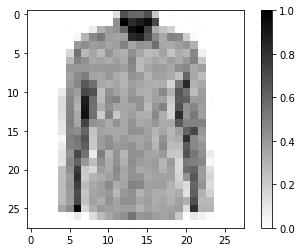

In [7]:
for image, label in test_dataset.take(1):
    break
    
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

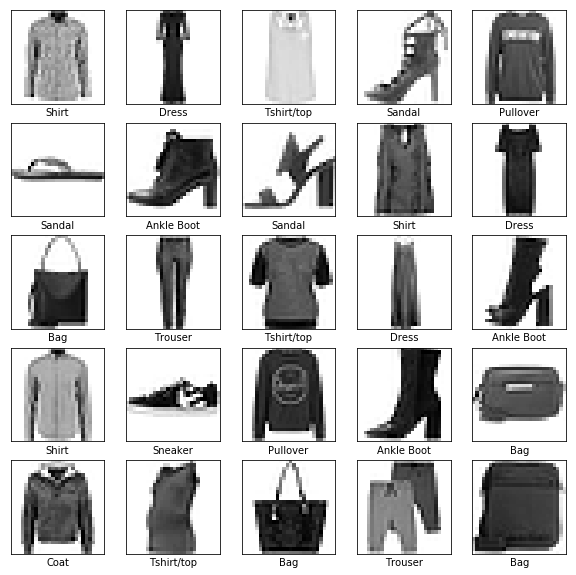

In [8]:
plt.figure(figsize = (10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap = plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
    
plt.show()

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding = "same", activation = tf.nn.relu, input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),
    tf.keras.layers.Conv2D(64, (3,3), padding = "same", activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

#Flatten data into 1-D array

In [10]:
model.compile(optimizer = tf.train.AdamOptimizer(learning_rate=0.005),
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [11]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [28]:
model.fit(train_dataset, epochs = 7, steps_per_epoch = math.ceil(num_train_examples/BATCH_SIZE))
#When epochs are higher, model may start overfitting or memorizing the data

Epoch 1/7


 236/1875 [==>...........................] - ETA: 4:19:59 - loss: 0.2069 - acc: 0.84 - ETA: 2:10:44 - loss: 0.1512 - acc: 0.90 - ETA: 1:27:40 - loss: 0.2055 - acc: 0.92 - ETA: 1:06:13 - loss: 0.2012 - acc: 0.92 - ETA: 53:18 - loss: 0.1903 - acc: 0.9250 - ETA: 44:40 - loss: 0.1881 - acc: 0.92 - ETA: 38:31 - loss: 0.1719 - acc: 0.92 - ETA: 33:56 - loss: 0.1622 - acc: 0.92 - ETA: 30:21 - loss: 0.1597 - acc: 0.93 - ETA: 27:28 - loss: 0.1612 - acc: 0.93 - ETA: 25:07 - loss: 0.1617 - acc: 0.93 - ETA: 23:10 - loss: 0.1621 - acc: 0.93 - ETA: 21:31 - loss: 0.1537 - acc: 0.93 - ETA: 20:07 - loss: 0.1679 - acc: 0.93 - ETA: 18:56 - loss: 0.1694 - acc: 0.93 - ETA: 17:53 - loss: 0.1668 - acc: 0.93 - ETA: 16:56 - loss: 0.1707 - acc: 0.93 - ETA: 16:06 - loss: 0.1675 - acc: 0.93 - ETA: 15:21 - loss: 0.1724 - acc: 0.93 - ETA: 14:41 - loss: 0.1733 - acc: 0.93 - ETA: 14:04 - loss: 0.1859 - acc: 0.92 - ETA: 13:30 - loss: 0.1860 - acc: 0.92 - ETA: 13:00 - loss: 0.1871 - acc: 0.92 - ETA: 12:31 - loss: 0.1814

 467/1875 [======>.......................] - ETA: 2:28 - loss: 0.1746 - acc: 0.935 - ETA: 2:27 - loss: 0.1749 - acc: 0.935 - ETA: 2:27 - loss: 0.1753 - acc: 0.935 - ETA: 2:27 - loss: 0.1752 - acc: 0.935 - ETA: 2:26 - loss: 0.1775 - acc: 0.935 - ETA: 2:26 - loss: 0.1771 - acc: 0.935 - ETA: 2:26 - loss: 0.1767 - acc: 0.935 - ETA: 2:26 - loss: 0.1767 - acc: 0.935 - ETA: 2:25 - loss: 0.1764 - acc: 0.935 - ETA: 2:25 - loss: 0.1768 - acc: 0.935 - ETA: 2:25 - loss: 0.1779 - acc: 0.935 - ETA: 2:24 - loss: 0.1774 - acc: 0.935 - ETA: 2:23 - loss: 0.1773 - acc: 0.935 - ETA: 2:23 - loss: 0.1766 - acc: 0.935 - ETA: 2:22 - loss: 0.1772 - acc: 0.935 - ETA: 2:21 - loss: 0.1768 - acc: 0.935 - ETA: 2:21 - loss: 0.1766 - acc: 0.935 - ETA: 2:20 - loss: 0.1780 - acc: 0.935 - ETA: 2:19 - loss: 0.1775 - acc: 0.935 - ETA: 2:19 - loss: 0.1769 - acc: 0.935 - ETA: 2:18 - loss: 0.1776 - acc: 0.935 - ETA: 2:18 - loss: 0.1789 - acc: 0.935 - ETA: 2:17 - loss: 0.1782 - acc: 0.935 - ETA: 2:16 - loss: 0.1783 - acc: 0.9

 671/1875 [=========>....................] - ETA: 1:44 - loss: 0.1789 - acc: 0.934 - ETA: 1:44 - loss: 0.1791 - acc: 0.934 - ETA: 1:44 - loss: 0.1792 - acc: 0.934 - ETA: 1:44 - loss: 0.1791 - acc: 0.934 - ETA: 1:44 - loss: 0.1792 - acc: 0.933 - ETA: 1:44 - loss: 0.1793 - acc: 0.933 - ETA: 1:44 - loss: 0.1792 - acc: 0.934 - ETA: 1:44 - loss: 0.1794 - acc: 0.934 - ETA: 1:43 - loss: 0.1792 - acc: 0.934 - ETA: 1:43 - loss: 0.1790 - acc: 0.934 - ETA: 1:43 - loss: 0.1790 - acc: 0.934 - ETA: 1:43 - loss: 0.1793 - acc: 0.934 - ETA: 1:43 - loss: 0.1797 - acc: 0.934 - ETA: 1:43 - loss: 0.1803 - acc: 0.934 - ETA: 1:43 - loss: 0.1800 - acc: 0.934 - ETA: 1:43 - loss: 0.1798 - acc: 0.934 - ETA: 1:43 - loss: 0.1795 - acc: 0.934 - ETA: 1:42 - loss: 0.1794 - acc: 0.934 - ETA: 1:42 - loss: 0.1795 - acc: 0.934 - ETA: 1:42 - loss: 0.1795 - acc: 0.934 - ETA: 1:42 - loss: 0.1793 - acc: 0.934 - ETA: 1:42 - loss: 0.1797 - acc: 0.934 - ETA: 1:42 - loss: 0.1797 - acc: 0.934 - ETA: 1:42 - loss: 0.1796 - acc: 0.9

 875/1875 [=============>................] - ETA: 1:23 - loss: 0.1848 - acc: 0.931 - ETA: 1:23 - loss: 0.1846 - acc: 0.931 - ETA: 1:23 - loss: 0.1847 - acc: 0.931 - ETA: 1:23 - loss: 0.1846 - acc: 0.931 - ETA: 1:23 - loss: 0.1844 - acc: 0.931 - ETA: 1:22 - loss: 0.1844 - acc: 0.931 - ETA: 1:22 - loss: 0.1845 - acc: 0.931 - ETA: 1:22 - loss: 0.1844 - acc: 0.931 - ETA: 1:22 - loss: 0.1846 - acc: 0.931 - ETA: 1:22 - loss: 0.1844 - acc: 0.931 - ETA: 1:22 - loss: 0.1844 - acc: 0.931 - ETA: 1:22 - loss: 0.1845 - acc: 0.931 - ETA: 1:22 - loss: 0.1848 - acc: 0.931 - ETA: 1:22 - loss: 0.1848 - acc: 0.931 - ETA: 1:22 - loss: 0.1850 - acc: 0.931 - ETA: 1:22 - loss: 0.1849 - acc: 0.931 - ETA: 1:21 - loss: 0.1848 - acc: 0.931 - ETA: 1:21 - loss: 0.1847 - acc: 0.931 - ETA: 1:21 - loss: 0.1849 - acc: 0.931 - ETA: 1:21 - loss: 0.1851 - acc: 0.931 - ETA: 1:21 - loss: 0.1851 - acc: 0.931 - ETA: 1:21 - loss: 0.1850 - acc: 0.931 - ETA: 1:21 - loss: 0.1849 - acc: 0.931 - ETA: 1:21 - loss: 0.1848 - acc: 0.9

1086/1875 [================>.............] - ETA: 1:05 - loss: 0.1853 - acc: 0.931 - ETA: 1:05 - loss: 0.1852 - acc: 0.931 - ETA: 1:05 - loss: 0.1852 - acc: 0.931 - ETA: 1:05 - loss: 0.1851 - acc: 0.931 - ETA: 1:05 - loss: 0.1853 - acc: 0.931 - ETA: 1:05 - loss: 0.1851 - acc: 0.931 - ETA: 1:05 - loss: 0.1852 - acc: 0.931 - ETA: 1:05 - loss: 0.1855 - acc: 0.931 - ETA: 1:05 - loss: 0.1855 - acc: 0.931 - ETA: 1:05 - loss: 0.1854 - acc: 0.931 - ETA: 1:05 - loss: 0.1853 - acc: 0.931 - ETA: 1:05 - loss: 0.1853 - acc: 0.931 - ETA: 1:04 - loss: 0.1852 - acc: 0.931 - ETA: 1:04 - loss: 0.1851 - acc: 0.931 - ETA: 1:04 - loss: 0.1851 - acc: 0.931 - ETA: 1:04 - loss: 0.1851 - acc: 0.931 - ETA: 1:04 - loss: 0.1850 - acc: 0.931 - ETA: 1:04 - loss: 0.1849 - acc: 0.932 - ETA: 1:04 - loss: 0.1850 - acc: 0.931 - ETA: 1:04 - loss: 0.1851 - acc: 0.931 - ETA: 1:04 - loss: 0.1849 - acc: 0.932 - ETA: 1:04 - loss: 0.1848 - acc: 0.932 - ETA: 1:04 - loss: 0.1847 - acc: 0.932 - ETA: 1:04 - loss: 0.1846 - acc: 0.9

1301/1875 [===================>..........] - ETA: 50s - loss: 0.1814 - acc: 0.93 - ETA: 50s - loss: 0.1813 - acc: 0.93 - ETA: 50s - loss: 0.1814 - acc: 0.93 - ETA: 50s - loss: 0.1813 - acc: 0.93 - ETA: 50s - loss: 0.1812 - acc: 0.93 - ETA: 50s - loss: 0.1812 - acc: 0.93 - ETA: 49s - loss: 0.1812 - acc: 0.93 - ETA: 49s - loss: 0.1811 - acc: 0.93 - ETA: 49s - loss: 0.1811 - acc: 0.93 - ETA: 49s - loss: 0.1810 - acc: 0.93 - ETA: 49s - loss: 0.1810 - acc: 0.93 - ETA: 49s - loss: 0.1809 - acc: 0.93 - ETA: 49s - loss: 0.1808 - acc: 0.93 - ETA: 49s - loss: 0.1809 - acc: 0.93 - ETA: 49s - loss: 0.1807 - acc: 0.93 - ETA: 49s - loss: 0.1806 - acc: 0.93 - ETA: 49s - loss: 0.1805 - acc: 0.93 - ETA: 49s - loss: 0.1804 - acc: 0.93 - ETA: 49s - loss: 0.1806 - acc: 0.93 - ETA: 49s - loss: 0.1805 - acc: 0.93 - ETA: 48s - loss: 0.1804 - acc: 0.93 - ETA: 48s - loss: 0.1805 - acc: 0.93 - ETA: 48s - loss: 0.1805 - acc: 0.93 - ETA: 48s - loss: 0.1805 - acc: 0.93 - ETA: 48s - loss: 0.1804 - acc: 0.93 - ETA: 

1516/1875 [=======================>......] - ETA: 35s - loss: 0.1803 - acc: 0.93 - ETA: 35s - loss: 0.1804 - acc: 0.93 - ETA: 35s - loss: 0.1804 - acc: 0.93 - ETA: 35s - loss: 0.1803 - acc: 0.93 - ETA: 35s - loss: 0.1803 - acc: 0.93 - ETA: 35s - loss: 0.1803 - acc: 0.93 - ETA: 35s - loss: 0.1803 - acc: 0.93 - ETA: 35s - loss: 0.1803 - acc: 0.93 - ETA: 35s - loss: 0.1803 - acc: 0.93 - ETA: 35s - loss: 0.1802 - acc: 0.93 - ETA: 35s - loss: 0.1803 - acc: 0.93 - ETA: 35s - loss: 0.1804 - acc: 0.93 - ETA: 35s - loss: 0.1804 - acc: 0.93 - ETA: 35s - loss: 0.1804 - acc: 0.93 - ETA: 34s - loss: 0.1803 - acc: 0.93 - ETA: 34s - loss: 0.1803 - acc: 0.93 - ETA: 34s - loss: 0.1804 - acc: 0.93 - ETA: 34s - loss: 0.1804 - acc: 0.93 - ETA: 34s - loss: 0.1803 - acc: 0.93 - ETA: 34s - loss: 0.1803 - acc: 0.93 - ETA: 34s - loss: 0.1803 - acc: 0.93 - ETA: 34s - loss: 0.1804 - acc: 0.93 - ETA: 34s - loss: 0.1803 - acc: 0.93 - ETA: 34s - loss: 0.1804 - acc: 0.93 - ETA: 34s - loss: 0.1804 - acc: 0.93 - ETA: 

1731/1875 [==========================>...] - ETA: 22s - loss: 0.1806 - acc: 0.93 - ETA: 21s - loss: 0.1805 - acc: 0.93 - ETA: 21s - loss: 0.1804 - acc: 0.93 - ETA: 21s - loss: 0.1805 - acc: 0.93 - ETA: 21s - loss: 0.1804 - acc: 0.93 - ETA: 21s - loss: 0.1803 - acc: 0.93 - ETA: 21s - loss: 0.1805 - acc: 0.93 - ETA: 21s - loss: 0.1804 - acc: 0.93 - ETA: 21s - loss: 0.1804 - acc: 0.93 - ETA: 21s - loss: 0.1805 - acc: 0.93 - ETA: 21s - loss: 0.1804 - acc: 0.93 - ETA: 21s - loss: 0.1804 - acc: 0.93 - ETA: 21s - loss: 0.1803 - acc: 0.93 - ETA: 21s - loss: 0.1803 - acc: 0.93 - ETA: 21s - loss: 0.1803 - acc: 0.93 - ETA: 21s - loss: 0.1803 - acc: 0.93 - ETA: 21s - loss: 0.1804 - acc: 0.93 - ETA: 20s - loss: 0.1803 - acc: 0.93 - ETA: 20s - loss: 0.1803 - acc: 0.93 - ETA: 20s - loss: 0.1803 - acc: 0.93 - ETA: 20s - loss: 0.1802 - acc: 0.93 - ETA: 20s - loss: 0.1801 - acc: 0.93 - ETA: 20s - loss: 0.1801 - acc: 0.93 - ETA: 20s - loss: 0.1800 - acc: 0.93 - ETA: 20s - loss: 0.1804 - acc: 0.93 - ETA: 

1875/1875 [==============================] - ETA: 8s - loss: 0.1789 - acc: 0.934 - ETA: 8s - loss: 0.1789 - acc: 0.934 - ETA: 8s - loss: 0.1789 - acc: 0.934 - ETA: 8s - loss: 0.1789 - acc: 0.934 - ETA: 8s - loss: 0.1790 - acc: 0.934 - ETA: 8s - loss: 0.1790 - acc: 0.934 - ETA: 8s - loss: 0.1790 - acc: 0.934 - ETA: 8s - loss: 0.1790 - acc: 0.934 - ETA: 8s - loss: 0.1790 - acc: 0.934 - ETA: 8s - loss: 0.1790 - acc: 0.934 - ETA: 8s - loss: 0.1789 - acc: 0.934 - ETA: 8s - loss: 0.1789 - acc: 0.934 - ETA: 7s - loss: 0.1789 - acc: 0.934 - ETA: 7s - loss: 0.1789 - acc: 0.934 - ETA: 7s - loss: 0.1790 - acc: 0.934 - ETA: 7s - loss: 0.1790 - acc: 0.934 - ETA: 7s - loss: 0.1789 - acc: 0.934 - ETA: 7s - loss: 0.1790 - acc: 0.934 - ETA: 7s - loss: 0.1789 - acc: 0.934 - ETA: 7s - loss: 0.1790 - acc: 0.934 - ETA: 7s - loss: 0.1790 - acc: 0.934 - ETA: 7s - loss: 0.1789 - acc: 0.934 - ETA: 7s - loss: 0.1790 - acc: 0.934 - ETA: 7s - loss: 0.1790 - acc: 0.934 - ETA: 7s - loss: 0.1789 - acc: 0.934 - ETA: 

 204/1875 [==>...........................] - ETA: 5:47 - loss: 0.1081 - acc: 0.937 - ETA: 3:43 - loss: 0.0890 - acc: 0.968 - ETA: 3:02 - loss: 0.0664 - acc: 0.979 - ETA: 2:41 - loss: 0.0734 - acc: 0.976 - ETA: 2:29 - loss: 0.1015 - acc: 0.968 - ETA: 2:21 - loss: 0.1119 - acc: 0.963 - ETA: 2:16 - loss: 0.1260 - acc: 0.959 - ETA: 2:12 - loss: 0.1142 - acc: 0.964 - ETA: 2:09 - loss: 0.1116 - acc: 0.961 - ETA: 2:06 - loss: 0.1103 - acc: 0.959 - ETA: 2:04 - loss: 0.1063 - acc: 0.960 - ETA: 2:01 - loss: 0.1222 - acc: 0.950 - ETA: 2:00 - loss: 0.1296 - acc: 0.947 - ETA: 1:59 - loss: 0.1297 - acc: 0.948 - ETA: 1:57 - loss: 0.1413 - acc: 0.943 - ETA: 1:56 - loss: 0.1408 - acc: 0.943 - ETA: 1:55 - loss: 0.1450 - acc: 0.944 - ETA: 1:54 - loss: 0.1463 - acc: 0.944 - ETA: 1:54 - loss: 0.1518 - acc: 0.939 - ETA: 1:53 - loss: 0.1571 - acc: 0.937 - ETA: 1:52 - loss: 0.1544 - acc: 0.939 - ETA: 1:52 - loss: 0.1511 - acc: 0.940 - ETA: 1:51 - loss: 0.1570 - acc: 0.940 - ETA: 1:50 - loss: 0.1640 - acc: 0.9

 410/1875 [=====>........................] - ETA: 1:33 - loss: 0.1645 - acc: 0.935 - ETA: 1:33 - loss: 0.1648 - acc: 0.934 - ETA: 1:33 - loss: 0.1659 - acc: 0.934 - ETA: 1:33 - loss: 0.1655 - acc: 0.934 - ETA: 1:33 - loss: 0.1667 - acc: 0.934 - ETA: 1:33 - loss: 0.1660 - acc: 0.934 - ETA: 1:32 - loss: 0.1691 - acc: 0.934 - ETA: 1:32 - loss: 0.1692 - acc: 0.934 - ETA: 1:32 - loss: 0.1705 - acc: 0.933 - ETA: 1:32 - loss: 0.1704 - acc: 0.933 - ETA: 1:32 - loss: 0.1707 - acc: 0.933 - ETA: 1:32 - loss: 0.1710 - acc: 0.933 - ETA: 1:32 - loss: 0.1705 - acc: 0.933 - ETA: 1:32 - loss: 0.1698 - acc: 0.933 - ETA: 1:32 - loss: 0.1698 - acc: 0.933 - ETA: 1:32 - loss: 0.1694 - acc: 0.933 - ETA: 1:32 - loss: 0.1694 - acc: 0.934 - ETA: 1:32 - loss: 0.1695 - acc: 0.933 - ETA: 1:32 - loss: 0.1698 - acc: 0.933 - ETA: 1:32 - loss: 0.1701 - acc: 0.933 - ETA: 1:32 - loss: 0.1699 - acc: 0.933 - ETA: 1:31 - loss: 0.1697 - acc: 0.933 - ETA: 1:31 - loss: 0.1698 - acc: 0.933 - ETA: 1:31 - loss: 0.1705 - acc: 0.9

 615/1875 [========>.....................] - ETA: 1:22 - loss: 0.1715 - acc: 0.933 - ETA: 1:22 - loss: 0.1715 - acc: 0.933 - ETA: 1:22 - loss: 0.1714 - acc: 0.933 - ETA: 1:22 - loss: 0.1718 - acc: 0.933 - ETA: 1:22 - loss: 0.1714 - acc: 0.933 - ETA: 1:22 - loss: 0.1725 - acc: 0.933 - ETA: 1:22 - loss: 0.1722 - acc: 0.933 - ETA: 1:21 - loss: 0.1723 - acc: 0.933 - ETA: 1:21 - loss: 0.1724 - acc: 0.933 - ETA: 1:21 - loss: 0.1725 - acc: 0.933 - ETA: 1:21 - loss: 0.1722 - acc: 0.933 - ETA: 1:21 - loss: 0.1720 - acc: 0.933 - ETA: 1:21 - loss: 0.1718 - acc: 0.933 - ETA: 1:21 - loss: 0.1717 - acc: 0.933 - ETA: 1:21 - loss: 0.1715 - acc: 0.934 - ETA: 1:21 - loss: 0.1714 - acc: 0.934 - ETA: 1:21 - loss: 0.1715 - acc: 0.934 - ETA: 1:21 - loss: 0.1714 - acc: 0.934 - ETA: 1:21 - loss: 0.1714 - acc: 0.934 - ETA: 1:21 - loss: 0.1711 - acc: 0.934 - ETA: 1:21 - loss: 0.1711 - acc: 0.934 - ETA: 1:21 - loss: 0.1712 - acc: 0.934 - ETA: 1:21 - loss: 0.1711 - acc: 0.934 - ETA: 1:21 - loss: 0.1711 - acc: 0.9

 819/1875 [============>.................] - ETA: 1:10 - loss: 0.1728 - acc: 0.934 - ETA: 1:10 - loss: 0.1730 - acc: 0.934 - ETA: 1:10 - loss: 0.1732 - acc: 0.934 - ETA: 1:10 - loss: 0.1733 - acc: 0.934 - ETA: 1:10 - loss: 0.1733 - acc: 0.934 - ETA: 1:10 - loss: 0.1731 - acc: 0.934 - ETA: 1:09 - loss: 0.1730 - acc: 0.934 - ETA: 1:09 - loss: 0.1730 - acc: 0.934 - ETA: 1:09 - loss: 0.1729 - acc: 0.934 - ETA: 1:09 - loss: 0.1729 - acc: 0.934 - ETA: 1:09 - loss: 0.1731 - acc: 0.934 - ETA: 1:09 - loss: 0.1729 - acc: 0.934 - ETA: 1:09 - loss: 0.1728 - acc: 0.934 - ETA: 1:09 - loss: 0.1729 - acc: 0.934 - ETA: 1:09 - loss: 0.1727 - acc: 0.934 - ETA: 1:09 - loss: 0.1726 - acc: 0.934 - ETA: 1:09 - loss: 0.1729 - acc: 0.934 - ETA: 1:09 - loss: 0.1728 - acc: 0.934 - ETA: 1:09 - loss: 0.1730 - acc: 0.934 - ETA: 1:09 - loss: 0.1733 - acc: 0.934 - ETA: 1:09 - loss: 0.1731 - acc: 0.934 - ETA: 1:09 - loss: 0.1730 - acc: 0.934 - ETA: 1:09 - loss: 0.1733 - acc: 0.934 - ETA: 1:08 - loss: 0.1732 - acc: 0.9

1034/1875 [===============>..............] - ETA: 59s - loss: 0.1718 - acc: 0.935 - ETA: 59s - loss: 0.1719 - acc: 0.93 - ETA: 59s - loss: 0.1719 - acc: 0.93 - ETA: 59s - loss: 0.1721 - acc: 0.93 - ETA: 59s - loss: 0.1720 - acc: 0.93 - ETA: 59s - loss: 0.1720 - acc: 0.93 - ETA: 59s - loss: 0.1720 - acc: 0.93 - ETA: 59s - loss: 0.1719 - acc: 0.93 - ETA: 59s - loss: 0.1719 - acc: 0.93 - ETA: 59s - loss: 0.1719 - acc: 0.93 - ETA: 59s - loss: 0.1718 - acc: 0.93 - ETA: 59s - loss: 0.1718 - acc: 0.93 - ETA: 59s - loss: 0.1722 - acc: 0.93 - ETA: 59s - loss: 0.1723 - acc: 0.93 - ETA: 59s - loss: 0.1725 - acc: 0.93 - ETA: 59s - loss: 0.1724 - acc: 0.93 - ETA: 59s - loss: 0.1722 - acc: 0.93 - ETA: 59s - loss: 0.1722 - acc: 0.93 - ETA: 59s - loss: 0.1722 - acc: 0.93 - ETA: 59s - loss: 0.1721 - acc: 0.93 - ETA: 59s - loss: 0.1719 - acc: 0.93 - ETA: 58s - loss: 0.1721 - acc: 0.93 - ETA: 58s - loss: 0.1721 - acc: 0.93 - ETA: 58s - loss: 0.1722 - acc: 0.93 - ETA: 58s - loss: 0.1721 - acc: 0.93 - ETA:

1249/1875 [==================>...........] - ETA: 47s - loss: 0.1711 - acc: 0.93 - ETA: 47s - loss: 0.1710 - acc: 0.93 - ETA: 47s - loss: 0.1709 - acc: 0.93 - ETA: 47s - loss: 0.1709 - acc: 0.93 - ETA: 47s - loss: 0.1709 - acc: 0.93 - ETA: 47s - loss: 0.1710 - acc: 0.93 - ETA: 47s - loss: 0.1709 - acc: 0.93 - ETA: 47s - loss: 0.1710 - acc: 0.93 - ETA: 47s - loss: 0.1708 - acc: 0.93 - ETA: 47s - loss: 0.1708 - acc: 0.93 - ETA: 47s - loss: 0.1707 - acc: 0.93 - ETA: 47s - loss: 0.1707 - acc: 0.93 - ETA: 47s - loss: 0.1707 - acc: 0.93 - ETA: 47s - loss: 0.1707 - acc: 0.93 - ETA: 47s - loss: 0.1710 - acc: 0.93 - ETA: 47s - loss: 0.1711 - acc: 0.93 - ETA: 47s - loss: 0.1710 - acc: 0.93 - ETA: 46s - loss: 0.1713 - acc: 0.93 - ETA: 46s - loss: 0.1712 - acc: 0.93 - ETA: 46s - loss: 0.1712 - acc: 0.93 - ETA: 46s - loss: 0.1711 - acc: 0.93 - ETA: 46s - loss: 0.1713 - acc: 0.93 - ETA: 46s - loss: 0.1712 - acc: 0.93 - ETA: 46s - loss: 0.1713 - acc: 0.93 - ETA: 46s - loss: 0.1713 - acc: 0.93 - ETA: 

1464/1875 [======================>.......] - ETA: 35s - loss: 0.1713 - acc: 0.93 - ETA: 35s - loss: 0.1712 - acc: 0.93 - ETA: 35s - loss: 0.1711 - acc: 0.93 - ETA: 35s - loss: 0.1711 - acc: 0.93 - ETA: 35s - loss: 0.1711 - acc: 0.93 - ETA: 35s - loss: 0.1711 - acc: 0.93 - ETA: 35s - loss: 0.1710 - acc: 0.93 - ETA: 35s - loss: 0.1711 - acc: 0.93 - ETA: 35s - loss: 0.1712 - acc: 0.93 - ETA: 35s - loss: 0.1711 - acc: 0.93 - ETA: 34s - loss: 0.1711 - acc: 0.93 - ETA: 34s - loss: 0.1709 - acc: 0.93 - ETA: 34s - loss: 0.1708 - acc: 0.93 - ETA: 34s - loss: 0.1708 - acc: 0.93 - ETA: 34s - loss: 0.1708 - acc: 0.93 - ETA: 34s - loss: 0.1708 - acc: 0.93 - ETA: 34s - loss: 0.1710 - acc: 0.93 - ETA: 34s - loss: 0.1713 - acc: 0.93 - ETA: 34s - loss: 0.1714 - acc: 0.93 - ETA: 34s - loss: 0.1714 - acc: 0.93 - ETA: 34s - loss: 0.1715 - acc: 0.93 - ETA: 34s - loss: 0.1717 - acc: 0.93 - ETA: 34s - loss: 0.1717 - acc: 0.93 - ETA: 34s - loss: 0.1716 - acc: 0.93 - ETA: 34s - loss: 0.1716 - acc: 0.93 - ETA: 

1679/1875 [=========================>....] - ETA: 23s - loss: 0.1715 - acc: 0.93 - ETA: 23s - loss: 0.1714 - acc: 0.93 - ETA: 23s - loss: 0.1715 - acc: 0.93 - ETA: 23s - loss: 0.1714 - acc: 0.93 - ETA: 23s - loss: 0.1714 - acc: 0.93 - ETA: 23s - loss: 0.1715 - acc: 0.93 - ETA: 23s - loss: 0.1715 - acc: 0.93 - ETA: 22s - loss: 0.1715 - acc: 0.93 - ETA: 22s - loss: 0.1715 - acc: 0.93 - ETA: 22s - loss: 0.1715 - acc: 0.93 - ETA: 22s - loss: 0.1715 - acc: 0.93 - ETA: 22s - loss: 0.1714 - acc: 0.93 - ETA: 22s - loss: 0.1713 - acc: 0.93 - ETA: 22s - loss: 0.1714 - acc: 0.93 - ETA: 22s - loss: 0.1713 - acc: 0.93 - ETA: 22s - loss: 0.1713 - acc: 0.93 - ETA: 22s - loss: 0.1715 - acc: 0.93 - ETA: 22s - loss: 0.1714 - acc: 0.93 - ETA: 22s - loss: 0.1713 - acc: 0.93 - ETA: 22s - loss: 0.1714 - acc: 0.93 - ETA: 22s - loss: 0.1713 - acc: 0.93 - ETA: 22s - loss: 0.1712 - acc: 0.93 - ETA: 22s - loss: 0.1712 - acc: 0.93 - ETA: 22s - loss: 0.1712 - acc: 0.93 - ETA: 21s - loss: 0.1711 - acc: 0.93 - ETA: 

1875/1875 [==============================] - ETA: 11s - loss: 0.1689 - acc: 0.93 - ETA: 11s - loss: 0.1689 - acc: 0.93 - ETA: 10s - loss: 0.1689 - acc: 0.93 - ETA: 10s - loss: 0.1688 - acc: 0.93 - ETA: 10s - loss: 0.1688 - acc: 0.93 - ETA: 10s - loss: 0.1688 - acc: 0.93 - ETA: 10s - loss: 0.1687 - acc: 0.93 - ETA: 10s - loss: 0.1687 - acc: 0.93 - ETA: 10s - loss: 0.1689 - acc: 0.93 - ETA: 10s - loss: 0.1688 - acc: 0.93 - ETA: 10s - loss: 0.1688 - acc: 0.93 - ETA: 10s - loss: 0.1688 - acc: 0.93 - ETA: 10s - loss: 0.1687 - acc: 0.93 - ETA: 10s - loss: 0.1687 - acc: 0.93 - ETA: 10s - loss: 0.1687 - acc: 0.93 - ETA: 10s - loss: 0.1687 - acc: 0.93 - ETA: 10s - loss: 0.1690 - acc: 0.93 - ETA: 10s - loss: 0.1690 - acc: 0.93 - ETA: 10s - loss: 0.1690 - acc: 0.93 - ETA: 10s - loss: 0.1690 - acc: 0.93 - ETA: 9s - loss: 0.1690 - acc: 0.9372 - ETA: 9s - loss: 0.1689 - acc: 0.937 - ETA: 9s - loss: 0.1689 - acc: 0.937 - ETA: 9s - loss: 0.1689 - acc: 0.937 - ETA: 9s - loss: 0.1688 - acc: 0.937 - ETA:

 204/1875 [==>...........................] - ETA: 6:28 - loss: 0.1093 - acc: 0.937 - ETA: 4:06 - loss: 0.1122 - acc: 0.953 - ETA: 3:19 - loss: 0.0951 - acc: 0.968 - ETA: 2:57 - loss: 0.0967 - acc: 0.968 - ETA: 2:43 - loss: 0.1033 - acc: 0.950 - ETA: 2:32 - loss: 0.1028 - acc: 0.947 - ETA: 2:25 - loss: 0.1004 - acc: 0.955 - ETA: 2:20 - loss: 0.1132 - acc: 0.945 - ETA: 2:16 - loss: 0.1217 - acc: 0.944 - ETA: 2:13 - loss: 0.1578 - acc: 0.928 - ETA: 2:10 - loss: 0.1497 - acc: 0.934 - ETA: 2:08 - loss: 0.1402 - acc: 0.940 - ETA: 2:06 - loss: 0.1370 - acc: 0.939 - ETA: 2:05 - loss: 0.1337 - acc: 0.944 - ETA: 2:04 - loss: 0.1336 - acc: 0.943 - ETA: 2:03 - loss: 0.1345 - acc: 0.943 - ETA: 2:01 - loss: 0.1275 - acc: 0.946 - ETA: 2:00 - loss: 0.1213 - acc: 0.949 - ETA: 2:00 - loss: 0.1197 - acc: 0.950 - ETA: 1:59 - loss: 0.1311 - acc: 0.946 - ETA: 1:58 - loss: 0.1323 - acc: 0.946 - ETA: 1:57 - loss: 0.1282 - acc: 0.948 - ETA: 1:57 - loss: 0.1353 - acc: 0.947 - ETA: 1:57 - loss: 0.1396 - acc: 0.9

 411/1875 [=====>........................] - ETA: 1:37 - loss: 0.1502 - acc: 0.940 - ETA: 1:36 - loss: 0.1500 - acc: 0.940 - ETA: 1:36 - loss: 0.1501 - acc: 0.940 - ETA: 1:36 - loss: 0.1503 - acc: 0.940 - ETA: 1:36 - loss: 0.1502 - acc: 0.939 - ETA: 1:36 - loss: 0.1500 - acc: 0.939 - ETA: 1:36 - loss: 0.1495 - acc: 0.940 - ETA: 1:36 - loss: 0.1493 - acc: 0.940 - ETA: 1:36 - loss: 0.1499 - acc: 0.940 - ETA: 1:36 - loss: 0.1493 - acc: 0.940 - ETA: 1:36 - loss: 0.1492 - acc: 0.940 - ETA: 1:36 - loss: 0.1494 - acc: 0.940 - ETA: 1:36 - loss: 0.1490 - acc: 0.940 - ETA: 1:36 - loss: 0.1489 - acc: 0.940 - ETA: 1:36 - loss: 0.1484 - acc: 0.940 - ETA: 1:36 - loss: 0.1481 - acc: 0.941 - ETA: 1:36 - loss: 0.1478 - acc: 0.941 - ETA: 1:36 - loss: 0.1479 - acc: 0.941 - ETA: 1:36 - loss: 0.1477 - acc: 0.941 - ETA: 1:36 - loss: 0.1477 - acc: 0.941 - ETA: 1:36 - loss: 0.1478 - acc: 0.941 - ETA: 1:36 - loss: 0.1473 - acc: 0.941 - ETA: 1:36 - loss: 0.1477 - acc: 0.941 - ETA: 1:36 - loss: 0.1484 - acc: 0.9

 615/1875 [========>.....................] - ETA: 1:30 - loss: 0.1483 - acc: 0.942 - ETA: 1:30 - loss: 0.1481 - acc: 0.942 - ETA: 1:30 - loss: 0.1485 - acc: 0.942 - ETA: 1:30 - loss: 0.1487 - acc: 0.941 - ETA: 1:30 - loss: 0.1486 - acc: 0.942 - ETA: 1:30 - loss: 0.1486 - acc: 0.942 - ETA: 1:30 - loss: 0.1482 - acc: 0.942 - ETA: 1:30 - loss: 0.1484 - acc: 0.942 - ETA: 1:30 - loss: 0.1481 - acc: 0.942 - ETA: 1:30 - loss: 0.1477 - acc: 0.942 - ETA: 1:29 - loss: 0.1484 - acc: 0.942 - ETA: 1:29 - loss: 0.1485 - acc: 0.942 - ETA: 1:29 - loss: 0.1484 - acc: 0.942 - ETA: 1:29 - loss: 0.1483 - acc: 0.942 - ETA: 1:29 - loss: 0.1481 - acc: 0.942 - ETA: 1:29 - loss: 0.1479 - acc: 0.942 - ETA: 1:29 - loss: 0.1478 - acc: 0.942 - ETA: 1:29 - loss: 0.1478 - acc: 0.942 - ETA: 1:29 - loss: 0.1476 - acc: 0.942 - ETA: 1:29 - loss: 0.1475 - acc: 0.942 - ETA: 1:29 - loss: 0.1475 - acc: 0.942 - ETA: 1:29 - loss: 0.1478 - acc: 0.942 - ETA: 1:29 - loss: 0.1482 - acc: 0.942 - ETA: 1:29 - loss: 0.1481 - acc: 0.9

 819/1875 [============>.................] - ETA: 1:19 - loss: 0.1553 - acc: 0.940 - ETA: 1:19 - loss: 0.1551 - acc: 0.940 - ETA: 1:19 - loss: 0.1552 - acc: 0.940 - ETA: 1:19 - loss: 0.1552 - acc: 0.940 - ETA: 1:19 - loss: 0.1550 - acc: 0.941 - ETA: 1:19 - loss: 0.1551 - acc: 0.941 - ETA: 1:18 - loss: 0.1550 - acc: 0.941 - ETA: 1:18 - loss: 0.1548 - acc: 0.941 - ETA: 1:18 - loss: 0.1550 - acc: 0.941 - ETA: 1:18 - loss: 0.1549 - acc: 0.941 - ETA: 1:18 - loss: 0.1552 - acc: 0.941 - ETA: 1:18 - loss: 0.1552 - acc: 0.941 - ETA: 1:18 - loss: 0.1551 - acc: 0.941 - ETA: 1:18 - loss: 0.1551 - acc: 0.941 - ETA: 1:18 - loss: 0.1551 - acc: 0.941 - ETA: 1:18 - loss: 0.1550 - acc: 0.941 - ETA: 1:18 - loss: 0.1550 - acc: 0.941 - ETA: 1:18 - loss: 0.1550 - acc: 0.941 - ETA: 1:18 - loss: 0.1551 - acc: 0.941 - ETA: 1:18 - loss: 0.1552 - acc: 0.941 - ETA: 1:18 - loss: 0.1552 - acc: 0.941 - ETA: 1:18 - loss: 0.1551 - acc: 0.941 - ETA: 1:17 - loss: 0.1551 - acc: 0.941 - ETA: 1:17 - loss: 0.1549 - acc: 0.9

1028/1875 [===============>..............] - ETA: 1:07 - loss: 0.1575 - acc: 0.940 - ETA: 1:07 - loss: 0.1575 - acc: 0.940 - ETA: 1:07 - loss: 0.1575 - acc: 0.940 - ETA: 1:07 - loss: 0.1573 - acc: 0.940 - ETA: 1:07 - loss: 0.1572 - acc: 0.940 - ETA: 1:06 - loss: 0.1576 - acc: 0.940 - ETA: 1:06 - loss: 0.1575 - acc: 0.940 - ETA: 1:06 - loss: 0.1574 - acc: 0.940 - ETA: 1:06 - loss: 0.1575 - acc: 0.940 - ETA: 1:06 - loss: 0.1573 - acc: 0.940 - ETA: 1:06 - loss: 0.1574 - acc: 0.940 - ETA: 1:06 - loss: 0.1573 - acc: 0.940 - ETA: 1:06 - loss: 0.1572 - acc: 0.940 - ETA: 1:06 - loss: 0.1572 - acc: 0.940 - ETA: 1:06 - loss: 0.1572 - acc: 0.940 - ETA: 1:06 - loss: 0.1572 - acc: 0.940 - ETA: 1:06 - loss: 0.1570 - acc: 0.940 - ETA: 1:06 - loss: 0.1571 - acc: 0.940 - ETA: 1:06 - loss: 0.1570 - acc: 0.940 - ETA: 1:06 - loss: 0.1571 - acc: 0.940 - ETA: 1:06 - loss: 0.1570 - acc: 0.940 - ETA: 1:05 - loss: 0.1571 - acc: 0.940 - ETA: 1:05 - loss: 0.1570 - acc: 0.940 - ETA: 1:05 - loss: 0.1569 - acc: 0.9

1243/1875 [==================>...........] - ETA: 53s - loss: 0.1573 - acc: 0.94 - ETA: 53s - loss: 0.1572 - acc: 0.94 - ETA: 53s - loss: 0.1571 - acc: 0.94 - ETA: 53s - loss: 0.1571 - acc: 0.94 - ETA: 53s - loss: 0.1571 - acc: 0.94 - ETA: 53s - loss: 0.1571 - acc: 0.94 - ETA: 52s - loss: 0.1570 - acc: 0.94 - ETA: 52s - loss: 0.1568 - acc: 0.94 - ETA: 52s - loss: 0.1569 - acc: 0.94 - ETA: 52s - loss: 0.1568 - acc: 0.94 - ETA: 52s - loss: 0.1567 - acc: 0.94 - ETA: 52s - loss: 0.1567 - acc: 0.94 - ETA: 52s - loss: 0.1567 - acc: 0.94 - ETA: 52s - loss: 0.1566 - acc: 0.94 - ETA: 52s - loss: 0.1566 - acc: 0.94 - ETA: 52s - loss: 0.1569 - acc: 0.94 - ETA: 52s - loss: 0.1568 - acc: 0.94 - ETA: 52s - loss: 0.1567 - acc: 0.94 - ETA: 52s - loss: 0.1566 - acc: 0.94 - ETA: 52s - loss: 0.1569 - acc: 0.94 - ETA: 52s - loss: 0.1569 - acc: 0.94 - ETA: 51s - loss: 0.1568 - acc: 0.94 - ETA: 51s - loss: 0.1567 - acc: 0.94 - ETA: 51s - loss: 0.1567 - acc: 0.94 - ETA: 51s - loss: 0.1566 - acc: 0.94 - ETA: 

1458/1875 [======================>.......] - ETA: 39s - loss: 0.1538 - acc: 0.94 - ETA: 39s - loss: 0.1537 - acc: 0.94 - ETA: 39s - loss: 0.1538 - acc: 0.94 - ETA: 39s - loss: 0.1537 - acc: 0.94 - ETA: 38s - loss: 0.1537 - acc: 0.94 - ETA: 38s - loss: 0.1537 - acc: 0.94 - ETA: 38s - loss: 0.1537 - acc: 0.94 - ETA: 38s - loss: 0.1538 - acc: 0.94 - ETA: 38s - loss: 0.1537 - acc: 0.94 - ETA: 38s - loss: 0.1537 - acc: 0.94 - ETA: 38s - loss: 0.1539 - acc: 0.94 - ETA: 38s - loss: 0.1539 - acc: 0.94 - ETA: 38s - loss: 0.1538 - acc: 0.94 - ETA: 38s - loss: 0.1538 - acc: 0.94 - ETA: 38s - loss: 0.1537 - acc: 0.94 - ETA: 38s - loss: 0.1537 - acc: 0.94 - ETA: 38s - loss: 0.1539 - acc: 0.94 - ETA: 38s - loss: 0.1538 - acc: 0.94 - ETA: 38s - loss: 0.1537 - acc: 0.94 - ETA: 37s - loss: 0.1537 - acc: 0.94 - ETA: 37s - loss: 0.1537 - acc: 0.94 - ETA: 37s - loss: 0.1537 - acc: 0.94 - ETA: 37s - loss: 0.1536 - acc: 0.94 - ETA: 37s - loss: 0.1535 - acc: 0.94 - ETA: 37s - loss: 0.1535 - acc: 0.94 - ETA: 

1673/1875 [=========================>....] - ETA: 25s - loss: 0.1534 - acc: 0.94 - ETA: 25s - loss: 0.1534 - acc: 0.94 - ETA: 25s - loss: 0.1535 - acc: 0.94 - ETA: 25s - loss: 0.1536 - acc: 0.94 - ETA: 25s - loss: 0.1537 - acc: 0.94 - ETA: 25s - loss: 0.1538 - acc: 0.94 - ETA: 25s - loss: 0.1540 - acc: 0.94 - ETA: 25s - loss: 0.1542 - acc: 0.94 - ETA: 25s - loss: 0.1541 - acc: 0.94 - ETA: 25s - loss: 0.1541 - acc: 0.94 - ETA: 24s - loss: 0.1541 - acc: 0.94 - ETA: 24s - loss: 0.1540 - acc: 0.94 - ETA: 24s - loss: 0.1540 - acc: 0.94 - ETA: 24s - loss: 0.1540 - acc: 0.94 - ETA: 24s - loss: 0.1540 - acc: 0.94 - ETA: 24s - loss: 0.1540 - acc: 0.94 - ETA: 24s - loss: 0.1539 - acc: 0.94 - ETA: 24s - loss: 0.1540 - acc: 0.94 - ETA: 24s - loss: 0.1542 - acc: 0.94 - ETA: 24s - loss: 0.1541 - acc: 0.94 - ETA: 24s - loss: 0.1542 - acc: 0.94 - ETA: 24s - loss: 0.1542 - acc: 0.94 - ETA: 24s - loss: 0.1543 - acc: 0.94 - ETA: 24s - loss: 0.1543 - acc: 0.94 - ETA: 24s - loss: 0.1542 - acc: 0.94 - ETA: 

1875/1875 [==============================] - ETA: 12s - loss: 0.1539 - acc: 0.94 - ETA: 12s - loss: 0.1539 - acc: 0.94 - ETA: 12s - loss: 0.1539 - acc: 0.94 - ETA: 12s - loss: 0.1539 - acc: 0.94 - ETA: 12s - loss: 0.1539 - acc: 0.94 - ETA: 12s - loss: 0.1541 - acc: 0.94 - ETA: 11s - loss: 0.1541 - acc: 0.94 - ETA: 11s - loss: 0.1541 - acc: 0.94 - ETA: 11s - loss: 0.1540 - acc: 0.94 - ETA: 11s - loss: 0.1541 - acc: 0.94 - ETA: 11s - loss: 0.1540 - acc: 0.94 - ETA: 11s - loss: 0.1539 - acc: 0.94 - ETA: 11s - loss: 0.1539 - acc: 0.94 - ETA: 11s - loss: 0.1540 - acc: 0.94 - ETA: 11s - loss: 0.1540 - acc: 0.94 - ETA: 11s - loss: 0.1542 - acc: 0.94 - ETA: 11s - loss: 0.1541 - acc: 0.94 - ETA: 11s - loss: 0.1541 - acc: 0.94 - ETA: 11s - loss: 0.1541 - acc: 0.94 - ETA: 11s - loss: 0.1542 - acc: 0.94 - ETA: 11s - loss: 0.1541 - acc: 0.94 - ETA: 11s - loss: 0.1540 - acc: 0.94 - ETA: 10s - loss: 0.1541 - acc: 0.94 - ETA: 10s - loss: 0.1542 - acc: 0.94 - ETA: 10s - loss: 0.1541 - acc: 0.94 - ETA: 

 204/1875 [==>...........................] - ETA: 6:23 - loss: 0.2222 - acc: 0.906 - ETA: 4:04 - loss: 0.1691 - acc: 0.953 - ETA: 3:17 - loss: 0.1463 - acc: 0.958 - ETA: 2:55 - loss: 0.1301 - acc: 0.960 - ETA: 2:42 - loss: 0.1267 - acc: 0.962 - ETA: 2:32 - loss: 0.1448 - acc: 0.958 - ETA: 2:25 - loss: 0.1486 - acc: 0.946 - ETA: 2:20 - loss: 0.1345 - acc: 0.953 - ETA: 2:16 - loss: 0.1255 - acc: 0.954 - ETA: 2:13 - loss: 0.1236 - acc: 0.953 - ETA: 2:11 - loss: 0.1196 - acc: 0.954 - ETA: 2:09 - loss: 0.1415 - acc: 0.947 - ETA: 2:07 - loss: 0.1472 - acc: 0.944 - ETA: 2:06 - loss: 0.1496 - acc: 0.946 - ETA: 2:05 - loss: 0.1415 - acc: 0.950 - ETA: 2:04 - loss: 0.1410 - acc: 0.949 - ETA: 2:02 - loss: 0.1458 - acc: 0.946 - ETA: 2:01 - loss: 0.1418 - acc: 0.947 - ETA: 2:00 - loss: 0.1434 - acc: 0.947 - ETA: 1:59 - loss: 0.1486 - acc: 0.943 - ETA: 1:59 - loss: 0.1455 - acc: 0.944 - ETA: 1:58 - loss: 0.1439 - acc: 0.944 - ETA: 1:57 - loss: 0.1396 - acc: 0.945 - ETA: 1:57 - loss: 0.1349 - acc: 0.9

 408/1875 [=====>........................] - ETA: 1:55 - loss: 0.1444 - acc: 0.947 - ETA: 1:55 - loss: 0.1445 - acc: 0.947 - ETA: 1:54 - loss: 0.1452 - acc: 0.946 - ETA: 1:54 - loss: 0.1449 - acc: 0.946 - ETA: 1:54 - loss: 0.1454 - acc: 0.946 - ETA: 1:54 - loss: 0.1456 - acc: 0.946 - ETA: 1:54 - loss: 0.1453 - acc: 0.946 - ETA: 1:54 - loss: 0.1450 - acc: 0.946 - ETA: 1:54 - loss: 0.1453 - acc: 0.946 - ETA: 1:54 - loss: 0.1464 - acc: 0.945 - ETA: 1:53 - loss: 0.1468 - acc: 0.945 - ETA: 1:53 - loss: 0.1472 - acc: 0.945 - ETA: 1:53 - loss: 0.1468 - acc: 0.946 - ETA: 1:53 - loss: 0.1468 - acc: 0.946 - ETA: 1:53 - loss: 0.1465 - acc: 0.946 - ETA: 1:53 - loss: 0.1464 - acc: 0.946 - ETA: 1:53 - loss: 0.1464 - acc: 0.945 - ETA: 1:53 - loss: 0.1461 - acc: 0.945 - ETA: 1:53 - loss: 0.1458 - acc: 0.945 - ETA: 1:53 - loss: 0.1456 - acc: 0.945 - ETA: 1:53 - loss: 0.1455 - acc: 0.946 - ETA: 1:53 - loss: 0.1458 - acc: 0.945 - ETA: 1:53 - loss: 0.1460 - acc: 0.945 - ETA: 1:53 - loss: 0.1467 - acc: 0.9

 612/1875 [========>.....................] - ETA: 1:37 - loss: 0.1577 - acc: 0.943 - ETA: 1:37 - loss: 0.1577 - acc: 0.943 - ETA: 1:37 - loss: 0.1578 - acc: 0.943 - ETA: 1:37 - loss: 0.1579 - acc: 0.943 - ETA: 1:37 - loss: 0.1577 - acc: 0.943 - ETA: 1:37 - loss: 0.1576 - acc: 0.943 - ETA: 1:37 - loss: 0.1574 - acc: 0.943 - ETA: 1:37 - loss: 0.1576 - acc: 0.943 - ETA: 1:37 - loss: 0.1575 - acc: 0.943 - ETA: 1:37 - loss: 0.1573 - acc: 0.943 - ETA: 1:36 - loss: 0.1570 - acc: 0.943 - ETA: 1:36 - loss: 0.1569 - acc: 0.943 - ETA: 1:36 - loss: 0.1566 - acc: 0.943 - ETA: 1:36 - loss: 0.1566 - acc: 0.943 - ETA: 1:36 - loss: 0.1570 - acc: 0.943 - ETA: 1:36 - loss: 0.1567 - acc: 0.943 - ETA: 1:36 - loss: 0.1568 - acc: 0.943 - ETA: 1:36 - loss: 0.1566 - acc: 0.943 - ETA: 1:36 - loss: 0.1572 - acc: 0.943 - ETA: 1:36 - loss: 0.1573 - acc: 0.943 - ETA: 1:36 - loss: 0.1569 - acc: 0.943 - ETA: 1:36 - loss: 0.1570 - acc: 0.943 - ETA: 1:35 - loss: 0.1571 - acc: 0.943 - ETA: 1:35 - loss: 0.1571 - acc: 0.9

 816/1875 [============>.................] - ETA: 1:22 - loss: 0.1572 - acc: 0.942 - ETA: 1:22 - loss: 0.1570 - acc: 0.942 - ETA: 1:22 - loss: 0.1570 - acc: 0.942 - ETA: 1:22 - loss: 0.1569 - acc: 0.942 - ETA: 1:22 - loss: 0.1568 - acc: 0.942 - ETA: 1:21 - loss: 0.1569 - acc: 0.942 - ETA: 1:21 - loss: 0.1569 - acc: 0.942 - ETA: 1:21 - loss: 0.1568 - acc: 0.942 - ETA: 1:21 - loss: 0.1567 - acc: 0.942 - ETA: 1:21 - loss: 0.1565 - acc: 0.942 - ETA: 1:21 - loss: 0.1565 - acc: 0.942 - ETA: 1:21 - loss: 0.1563 - acc: 0.942 - ETA: 1:21 - loss: 0.1564 - acc: 0.942 - ETA: 1:21 - loss: 0.1564 - acc: 0.942 - ETA: 1:21 - loss: 0.1565 - acc: 0.942 - ETA: 1:21 - loss: 0.1568 - acc: 0.942 - ETA: 1:21 - loss: 0.1571 - acc: 0.942 - ETA: 1:21 - loss: 0.1570 - acc: 0.942 - ETA: 1:21 - loss: 0.1570 - acc: 0.942 - ETA: 1:20 - loss: 0.1571 - acc: 0.942 - ETA: 1:20 - loss: 0.1575 - acc: 0.942 - ETA: 1:20 - loss: 0.1575 - acc: 0.942 - ETA: 1:20 - loss: 0.1579 - acc: 0.942 - ETA: 1:20 - loss: 0.1578 - acc: 0.9

1025/1875 [===============>..............] - ETA: 1:07 - loss: 0.1559 - acc: 0.943 - ETA: 1:07 - loss: 0.1558 - acc: 0.943 - ETA: 1:07 - loss: 0.1559 - acc: 0.943 - ETA: 1:07 - loss: 0.1559 - acc: 0.943 - ETA: 1:07 - loss: 0.1560 - acc: 0.943 - ETA: 1:07 - loss: 0.1560 - acc: 0.943 - ETA: 1:07 - loss: 0.1562 - acc: 0.942 - ETA: 1:07 - loss: 0.1561 - acc: 0.943 - ETA: 1:07 - loss: 0.1560 - acc: 0.943 - ETA: 1:07 - loss: 0.1562 - acc: 0.942 - ETA: 1:07 - loss: 0.1561 - acc: 0.942 - ETA: 1:07 - loss: 0.1560 - acc: 0.943 - ETA: 1:07 - loss: 0.1558 - acc: 0.943 - ETA: 1:06 - loss: 0.1558 - acc: 0.943 - ETA: 1:06 - loss: 0.1557 - acc: 0.943 - ETA: 1:06 - loss: 0.1556 - acc: 0.943 - ETA: 1:06 - loss: 0.1555 - acc: 0.943 - ETA: 1:06 - loss: 0.1554 - acc: 0.943 - ETA: 1:06 - loss: 0.1554 - acc: 0.943 - ETA: 1:06 - loss: 0.1553 - acc: 0.943 - ETA: 1:06 - loss: 0.1552 - acc: 0.943 - ETA: 1:06 - loss: 0.1552 - acc: 0.943 - ETA: 1:06 - loss: 0.1552 - acc: 0.943 - ETA: 1:06 - loss: 0.1551 - acc: 0.9

1240/1875 [==================>...........] - ETA: 54s - loss: 0.1536 - acc: 0.94 - ETA: 54s - loss: 0.1535 - acc: 0.94 - ETA: 53s - loss: 0.1535 - acc: 0.94 - ETA: 53s - loss: 0.1533 - acc: 0.94 - ETA: 53s - loss: 0.1532 - acc: 0.94 - ETA: 53s - loss: 0.1532 - acc: 0.94 - ETA: 53s - loss: 0.1531 - acc: 0.94 - ETA: 53s - loss: 0.1531 - acc: 0.94 - ETA: 53s - loss: 0.1530 - acc: 0.94 - ETA: 53s - loss: 0.1530 - acc: 0.94 - ETA: 53s - loss: 0.1530 - acc: 0.94 - ETA: 53s - loss: 0.1531 - acc: 0.94 - ETA: 53s - loss: 0.1530 - acc: 0.94 - ETA: 53s - loss: 0.1530 - acc: 0.94 - ETA: 53s - loss: 0.1529 - acc: 0.94 - ETA: 53s - loss: 0.1528 - acc: 0.94 - ETA: 53s - loss: 0.1528 - acc: 0.94 - ETA: 53s - loss: 0.1526 - acc: 0.94 - ETA: 52s - loss: 0.1527 - acc: 0.94 - ETA: 52s - loss: 0.1530 - acc: 0.94 - ETA: 52s - loss: 0.1530 - acc: 0.94 - ETA: 52s - loss: 0.1530 - acc: 0.94 - ETA: 52s - loss: 0.1530 - acc: 0.94 - ETA: 52s - loss: 0.1532 - acc: 0.94 - ETA: 52s - loss: 0.1531 - acc: 0.94 - ETA: 

1455/1875 [======================>.......] - ETA: 40s - loss: 0.1517 - acc: 0.94 - ETA: 40s - loss: 0.1517 - acc: 0.94 - ETA: 40s - loss: 0.1517 - acc: 0.94 - ETA: 40s - loss: 0.1516 - acc: 0.94 - ETA: 39s - loss: 0.1515 - acc: 0.94 - ETA: 39s - loss: 0.1515 - acc: 0.94 - ETA: 39s - loss: 0.1514 - acc: 0.94 - ETA: 39s - loss: 0.1515 - acc: 0.94 - ETA: 39s - loss: 0.1516 - acc: 0.94 - ETA: 39s - loss: 0.1516 - acc: 0.94 - ETA: 39s - loss: 0.1515 - acc: 0.94 - ETA: 39s - loss: 0.1514 - acc: 0.94 - ETA: 39s - loss: 0.1515 - acc: 0.94 - ETA: 39s - loss: 0.1514 - acc: 0.94 - ETA: 39s - loss: 0.1515 - acc: 0.94 - ETA: 39s - loss: 0.1514 - acc: 0.94 - ETA: 39s - loss: 0.1515 - acc: 0.94 - ETA: 39s - loss: 0.1515 - acc: 0.94 - ETA: 39s - loss: 0.1515 - acc: 0.94 - ETA: 39s - loss: 0.1516 - acc: 0.94 - ETA: 38s - loss: 0.1515 - acc: 0.94 - ETA: 38s - loss: 0.1514 - acc: 0.94 - ETA: 38s - loss: 0.1514 - acc: 0.94 - ETA: 38s - loss: 0.1513 - acc: 0.94 - ETA: 38s - loss: 0.1514 - acc: 0.94 - ETA: 

1670/1875 [=========================>....] - ETA: 26s - loss: 0.1502 - acc: 0.94 - ETA: 26s - loss: 0.1502 - acc: 0.94 - ETA: 26s - loss: 0.1502 - acc: 0.94 - ETA: 26s - loss: 0.1502 - acc: 0.94 - ETA: 26s - loss: 0.1502 - acc: 0.94 - ETA: 26s - loss: 0.1501 - acc: 0.94 - ETA: 26s - loss: 0.1501 - acc: 0.94 - ETA: 26s - loss: 0.1502 - acc: 0.94 - ETA: 26s - loss: 0.1502 - acc: 0.94 - ETA: 25s - loss: 0.1501 - acc: 0.94 - ETA: 25s - loss: 0.1501 - acc: 0.94 - ETA: 25s - loss: 0.1502 - acc: 0.94 - ETA: 25s - loss: 0.1502 - acc: 0.94 - ETA: 25s - loss: 0.1503 - acc: 0.94 - ETA: 25s - loss: 0.1503 - acc: 0.94 - ETA: 25s - loss: 0.1502 - acc: 0.94 - ETA: 25s - loss: 0.1501 - acc: 0.94 - ETA: 25s - loss: 0.1501 - acc: 0.94 - ETA: 25s - loss: 0.1500 - acc: 0.94 - ETA: 25s - loss: 0.1500 - acc: 0.94 - ETA: 25s - loss: 0.1500 - acc: 0.94 - ETA: 25s - loss: 0.1500 - acc: 0.94 - ETA: 25s - loss: 0.1500 - acc: 0.94 - ETA: 25s - loss: 0.1499 - acc: 0.94 - ETA: 24s - loss: 0.1499 - acc: 0.94 - ETA: 

1875/1875 [==============================] - ETA: 12s - loss: 0.1494 - acc: 0.94 - ETA: 12s - loss: 0.1494 - acc: 0.94 - ETA: 12s - loss: 0.1494 - acc: 0.94 - ETA: 12s - loss: 0.1494 - acc: 0.94 - ETA: 12s - loss: 0.1494 - acc: 0.94 - ETA: 12s - loss: 0.1493 - acc: 0.94 - ETA: 12s - loss: 0.1493 - acc: 0.94 - ETA: 12s - loss: 0.1493 - acc: 0.94 - ETA: 12s - loss: 0.1493 - acc: 0.94 - ETA: 12s - loss: 0.1493 - acc: 0.94 - ETA: 12s - loss: 0.1493 - acc: 0.94 - ETA: 12s - loss: 0.1493 - acc: 0.94 - ETA: 12s - loss: 0.1492 - acc: 0.94 - ETA: 12s - loss: 0.1492 - acc: 0.94 - ETA: 12s - loss: 0.1492 - acc: 0.94 - ETA: 11s - loss: 0.1492 - acc: 0.94 - ETA: 11s - loss: 0.1492 - acc: 0.94 - ETA: 11s - loss: 0.1492 - acc: 0.94 - ETA: 11s - loss: 0.1491 - acc: 0.94 - ETA: 11s - loss: 0.1492 - acc: 0.94 - ETA: 11s - loss: 0.1491 - acc: 0.94 - ETA: 11s - loss: 0.1491 - acc: 0.94 - ETA: 11s - loss: 0.1490 - acc: 0.94 - ETA: 11s - loss: 0.1490 - acc: 0.94 - ETA: 11s - loss: 0.1490 - acc: 0.94 - ETA: 

 204/1875 [==>...........................] - ETA: 6:46 - loss: 0.0427 - acc: 1.000 - ETA: 4:21 - loss: 0.0515 - acc: 0.984 - ETA: 3:30 - loss: 0.0855 - acc: 0.968 - ETA: 3:05 - loss: 0.0971 - acc: 0.968 - ETA: 2:51 - loss: 0.1015 - acc: 0.962 - ETA: 2:41 - loss: 0.0956 - acc: 0.968 - ETA: 2:34 - loss: 0.1105 - acc: 0.955 - ETA: 2:29 - loss: 0.1051 - acc: 0.957 - ETA: 2:25 - loss: 0.1090 - acc: 0.954 - ETA: 2:22 - loss: 0.1086 - acc: 0.956 - ETA: 2:19 - loss: 0.1093 - acc: 0.954 - ETA: 2:17 - loss: 0.1467 - acc: 0.950 - ETA: 2:15 - loss: 0.1399 - acc: 0.954 - ETA: 2:13 - loss: 0.1352 - acc: 0.955 - ETA: 2:12 - loss: 0.1590 - acc: 0.950 - ETA: 2:11 - loss: 0.1629 - acc: 0.947 - ETA: 2:10 - loss: 0.1642 - acc: 0.943 - ETA: 2:09 - loss: 0.1661 - acc: 0.942 - ETA: 2:08 - loss: 0.1671 - acc: 0.940 - ETA: 2:07 - loss: 0.1751 - acc: 0.937 - ETA: 2:07 - loss: 0.1687 - acc: 0.939 - ETA: 2:07 - loss: 0.1683 - acc: 0.937 - ETA: 2:06 - loss: 0.1639 - acc: 0.938 - ETA: 2:05 - loss: 0.1590 - acc: 0.9

 408/1875 [=====>........................] - ETA: 1:48 - loss: 0.1486 - acc: 0.947 - ETA: 1:47 - loss: 0.1500 - acc: 0.947 - ETA: 1:47 - loss: 0.1506 - acc: 0.946 - ETA: 1:47 - loss: 0.1500 - acc: 0.947 - ETA: 1:47 - loss: 0.1497 - acc: 0.947 - ETA: 1:47 - loss: 0.1497 - acc: 0.947 - ETA: 1:47 - loss: 0.1497 - acc: 0.947 - ETA: 1:47 - loss: 0.1490 - acc: 0.947 - ETA: 1:47 - loss: 0.1484 - acc: 0.947 - ETA: 1:47 - loss: 0.1477 - acc: 0.947 - ETA: 1:47 - loss: 0.1473 - acc: 0.947 - ETA: 1:47 - loss: 0.1481 - acc: 0.947 - ETA: 1:47 - loss: 0.1479 - acc: 0.947 - ETA: 1:47 - loss: 0.1476 - acc: 0.947 - ETA: 1:46 - loss: 0.1473 - acc: 0.947 - ETA: 1:46 - loss: 0.1475 - acc: 0.947 - ETA: 1:46 - loss: 0.1472 - acc: 0.947 - ETA: 1:46 - loss: 0.1472 - acc: 0.946 - ETA: 1:46 - loss: 0.1476 - acc: 0.946 - ETA: 1:46 - loss: 0.1474 - acc: 0.946 - ETA: 1:46 - loss: 0.1471 - acc: 0.946 - ETA: 1:46 - loss: 0.1466 - acc: 0.947 - ETA: 1:47 - loss: 0.1462 - acc: 0.947 - ETA: 1:47 - loss: 0.1463 - acc: 0.9

 612/1875 [========>.....................] - ETA: 1:38 - loss: 0.1415 - acc: 0.948 - ETA: 1:38 - loss: 0.1414 - acc: 0.947 - ETA: 1:38 - loss: 0.1412 - acc: 0.947 - ETA: 1:37 - loss: 0.1409 - acc: 0.948 - ETA: 1:37 - loss: 0.1410 - acc: 0.947 - ETA: 1:37 - loss: 0.1407 - acc: 0.947 - ETA: 1:37 - loss: 0.1405 - acc: 0.948 - ETA: 1:37 - loss: 0.1407 - acc: 0.947 - ETA: 1:37 - loss: 0.1404 - acc: 0.948 - ETA: 1:37 - loss: 0.1405 - acc: 0.948 - ETA: 1:37 - loss: 0.1408 - acc: 0.947 - ETA: 1:37 - loss: 0.1406 - acc: 0.948 - ETA: 1:37 - loss: 0.1405 - acc: 0.948 - ETA: 1:37 - loss: 0.1405 - acc: 0.948 - ETA: 1:37 - loss: 0.1407 - acc: 0.947 - ETA: 1:37 - loss: 0.1405 - acc: 0.948 - ETA: 1:36 - loss: 0.1406 - acc: 0.947 - ETA: 1:36 - loss: 0.1408 - acc: 0.947 - ETA: 1:36 - loss: 0.1409 - acc: 0.947 - ETA: 1:36 - loss: 0.1407 - acc: 0.947 - ETA: 1:36 - loss: 0.1406 - acc: 0.947 - ETA: 1:36 - loss: 0.1407 - acc: 0.947 - ETA: 1:36 - loss: 0.1407 - acc: 0.947 - ETA: 1:36 - loss: 0.1409 - acc: 0.9

 816/1875 [============>.................] - ETA: 1:24 - loss: 0.1367 - acc: 0.950 - ETA: 1:24 - loss: 0.1365 - acc: 0.950 - ETA: 1:24 - loss: 0.1364 - acc: 0.950 - ETA: 1:24 - loss: 0.1363 - acc: 0.950 - ETA: 1:23 - loss: 0.1362 - acc: 0.950 - ETA: 1:23 - loss: 0.1367 - acc: 0.950 - ETA: 1:23 - loss: 0.1366 - acc: 0.950 - ETA: 1:23 - loss: 0.1374 - acc: 0.949 - ETA: 1:23 - loss: 0.1373 - acc: 0.950 - ETA: 1:23 - loss: 0.1372 - acc: 0.950 - ETA: 1:23 - loss: 0.1375 - acc: 0.950 - ETA: 1:23 - loss: 0.1373 - acc: 0.950 - ETA: 1:23 - loss: 0.1375 - acc: 0.950 - ETA: 1:23 - loss: 0.1374 - acc: 0.950 - ETA: 1:23 - loss: 0.1373 - acc: 0.950 - ETA: 1:23 - loss: 0.1373 - acc: 0.950 - ETA: 1:23 - loss: 0.1371 - acc: 0.950 - ETA: 1:23 - loss: 0.1372 - acc: 0.950 - ETA: 1:22 - loss: 0.1370 - acc: 0.950 - ETA: 1:22 - loss: 0.1370 - acc: 0.950 - ETA: 1:22 - loss: 0.1370 - acc: 0.950 - ETA: 1:22 - loss: 0.1369 - acc: 0.950 - ETA: 1:22 - loss: 0.1372 - acc: 0.950 - ETA: 1:22 - loss: 0.1370 - acc: 0.9

1023/1875 [===============>..............] - ETA: 1:09 - loss: 0.1346 - acc: 0.951 - ETA: 1:09 - loss: 0.1345 - acc: 0.951 - ETA: 1:09 - loss: 0.1346 - acc: 0.951 - ETA: 1:09 - loss: 0.1346 - acc: 0.951 - ETA: 1:09 - loss: 0.1346 - acc: 0.951 - ETA: 1:09 - loss: 0.1347 - acc: 0.951 - ETA: 1:09 - loss: 0.1349 - acc: 0.951 - ETA: 1:09 - loss: 0.1350 - acc: 0.951 - ETA: 1:09 - loss: 0.1350 - acc: 0.951 - ETA: 1:08 - loss: 0.1350 - acc: 0.951 - ETA: 1:08 - loss: 0.1349 - acc: 0.951 - ETA: 1:08 - loss: 0.1349 - acc: 0.951 - ETA: 1:08 - loss: 0.1351 - acc: 0.951 - ETA: 1:08 - loss: 0.1350 - acc: 0.951 - ETA: 1:08 - loss: 0.1349 - acc: 0.951 - ETA: 1:08 - loss: 0.1351 - acc: 0.951 - ETA: 1:08 - loss: 0.1350 - acc: 0.951 - ETA: 1:08 - loss: 0.1350 - acc: 0.951 - ETA: 1:08 - loss: 0.1349 - acc: 0.951 - ETA: 1:08 - loss: 0.1348 - acc: 0.951 - ETA: 1:08 - loss: 0.1347 - acc: 0.951 - ETA: 1:08 - loss: 0.1346 - acc: 0.951 - ETA: 1:08 - loss: 0.1346 - acc: 0.951 - ETA: 1:07 - loss: 0.1346 - acc: 0.9

1238/1875 [==================>...........] - ETA: 56s - loss: 0.1399 - acc: 0.95 - ETA: 56s - loss: 0.1398 - acc: 0.95 - ETA: 55s - loss: 0.1397 - acc: 0.95 - ETA: 55s - loss: 0.1398 - acc: 0.95 - ETA: 55s - loss: 0.1398 - acc: 0.95 - ETA: 55s - loss: 0.1397 - acc: 0.95 - ETA: 55s - loss: 0.1396 - acc: 0.95 - ETA: 55s - loss: 0.1397 - acc: 0.95 - ETA: 55s - loss: 0.1396 - acc: 0.95 - ETA: 55s - loss: 0.1395 - acc: 0.95 - ETA: 55s - loss: 0.1396 - acc: 0.95 - ETA: 55s - loss: 0.1397 - acc: 0.95 - ETA: 55s - loss: 0.1397 - acc: 0.95 - ETA: 55s - loss: 0.1398 - acc: 0.95 - ETA: 55s - loss: 0.1400 - acc: 0.95 - ETA: 55s - loss: 0.1399 - acc: 0.95 - ETA: 55s - loss: 0.1399 - acc: 0.95 - ETA: 54s - loss: 0.1398 - acc: 0.95 - ETA: 54s - loss: 0.1397 - acc: 0.95 - ETA: 54s - loss: 0.1396 - acc: 0.95 - ETA: 54s - loss: 0.1395 - acc: 0.95 - ETA: 54s - loss: 0.1395 - acc: 0.95 - ETA: 54s - loss: 0.1395 - acc: 0.95 - ETA: 54s - loss: 0.1395 - acc: 0.95 - ETA: 54s - loss: 0.1394 - acc: 0.95 - ETA: 

1453/1875 [======================>.......] - ETA: 41s - loss: 0.1381 - acc: 0.95 - ETA: 41s - loss: 0.1381 - acc: 0.95 - ETA: 41s - loss: 0.1380 - acc: 0.95 - ETA: 41s - loss: 0.1380 - acc: 0.95 - ETA: 41s - loss: 0.1380 - acc: 0.95 - ETA: 41s - loss: 0.1379 - acc: 0.95 - ETA: 41s - loss: 0.1379 - acc: 0.95 - ETA: 41s - loss: 0.1379 - acc: 0.95 - ETA: 41s - loss: 0.1378 - acc: 0.95 - ETA: 41s - loss: 0.1377 - acc: 0.95 - ETA: 41s - loss: 0.1376 - acc: 0.95 - ETA: 41s - loss: 0.1376 - acc: 0.95 - ETA: 41s - loss: 0.1375 - acc: 0.95 - ETA: 40s - loss: 0.1375 - acc: 0.95 - ETA: 40s - loss: 0.1376 - acc: 0.95 - ETA: 40s - loss: 0.1375 - acc: 0.95 - ETA: 40s - loss: 0.1375 - acc: 0.95 - ETA: 40s - loss: 0.1376 - acc: 0.95 - ETA: 40s - loss: 0.1375 - acc: 0.95 - ETA: 40s - loss: 0.1375 - acc: 0.95 - ETA: 40s - loss: 0.1374 - acc: 0.95 - ETA: 40s - loss: 0.1374 - acc: 0.95 - ETA: 40s - loss: 0.1374 - acc: 0.95 - ETA: 40s - loss: 0.1374 - acc: 0.95 - ETA: 40s - loss: 0.1374 - acc: 0.95 - ETA: 

1668/1875 [=========================>....] - ETA: 27s - loss: 0.1387 - acc: 0.95 - ETA: 27s - loss: 0.1386 - acc: 0.95 - ETA: 27s - loss: 0.1386 - acc: 0.95 - ETA: 27s - loss: 0.1386 - acc: 0.95 - ETA: 27s - loss: 0.1387 - acc: 0.95 - ETA: 27s - loss: 0.1387 - acc: 0.95 - ETA: 27s - loss: 0.1388 - acc: 0.95 - ETA: 27s - loss: 0.1389 - acc: 0.95 - ETA: 26s - loss: 0.1389 - acc: 0.95 - ETA: 26s - loss: 0.1389 - acc: 0.95 - ETA: 26s - loss: 0.1391 - acc: 0.95 - ETA: 26s - loss: 0.1391 - acc: 0.95 - ETA: 26s - loss: 0.1391 - acc: 0.95 - ETA: 26s - loss: 0.1390 - acc: 0.95 - ETA: 26s - loss: 0.1390 - acc: 0.95 - ETA: 26s - loss: 0.1390 - acc: 0.95 - ETA: 26s - loss: 0.1389 - acc: 0.95 - ETA: 26s - loss: 0.1389 - acc: 0.95 - ETA: 26s - loss: 0.1389 - acc: 0.95 - ETA: 26s - loss: 0.1389 - acc: 0.95 - ETA: 26s - loss: 0.1389 - acc: 0.95 - ETA: 26s - loss: 0.1388 - acc: 0.95 - ETA: 26s - loss: 0.1387 - acc: 0.95 - ETA: 25s - loss: 0.1387 - acc: 0.95 - ETA: 25s - loss: 0.1387 - acc: 0.95 - ETA: 

1875/1875 [==============================] - ETA: 13s - loss: 0.1394 - acc: 0.94 - ETA: 13s - loss: 0.1394 - acc: 0.94 - ETA: 13s - loss: 0.1395 - acc: 0.94 - ETA: 13s - loss: 0.1395 - acc: 0.94 - ETA: 13s - loss: 0.1396 - acc: 0.94 - ETA: 13s - loss: 0.1397 - acc: 0.94 - ETA: 13s - loss: 0.1397 - acc: 0.94 - ETA: 12s - loss: 0.1397 - acc: 0.94 - ETA: 12s - loss: 0.1397 - acc: 0.94 - ETA: 12s - loss: 0.1397 - acc: 0.94 - ETA: 12s - loss: 0.1397 - acc: 0.94 - ETA: 12s - loss: 0.1397 - acc: 0.94 - ETA: 12s - loss: 0.1397 - acc: 0.94 - ETA: 12s - loss: 0.1398 - acc: 0.94 - ETA: 12s - loss: 0.1398 - acc: 0.94 - ETA: 12s - loss: 0.1397 - acc: 0.94 - ETA: 12s - loss: 0.1397 - acc: 0.94 - ETA: 12s - loss: 0.1397 - acc: 0.94 - ETA: 12s - loss: 0.1397 - acc: 0.94 - ETA: 12s - loss: 0.1397 - acc: 0.94 - ETA: 12s - loss: 0.1396 - acc: 0.94 - ETA: 12s - loss: 0.1396 - acc: 0.94 - ETA: 11s - loss: 0.1396 - acc: 0.94 - ETA: 11s - loss: 0.1396 - acc: 0.94 - ETA: 11s - loss: 0.1395 - acc: 0.94 - ETA: 

 204/1875 [==>...........................] - ETA: 6:51 - loss: 0.1250 - acc: 0.968 - ETA: 4:26 - loss: 0.1834 - acc: 0.937 - ETA: 3:32 - loss: 0.1547 - acc: 0.947 - ETA: 3:06 - loss: 0.1452 - acc: 0.953 - ETA: 2:51 - loss: 0.1642 - acc: 0.937 - ETA: 2:41 - loss: 0.1467 - acc: 0.947 - ETA: 2:34 - loss: 0.1394 - acc: 0.950 - ETA: 2:29 - loss: 0.1355 - acc: 0.953 - ETA: 2:25 - loss: 0.1354 - acc: 0.954 - ETA: 2:22 - loss: 0.1319 - acc: 0.953 - ETA: 2:20 - loss: 0.1299 - acc: 0.951 - ETA: 2:17 - loss: 0.1251 - acc: 0.953 - ETA: 2:15 - loss: 0.1183 - acc: 0.956 - ETA: 2:15 - loss: 0.1304 - acc: 0.953 - ETA: 2:13 - loss: 0.1281 - acc: 0.954 - ETA: 2:12 - loss: 0.1227 - acc: 0.957 - ETA: 2:11 - loss: 0.1241 - acc: 0.955 - ETA: 2:09 - loss: 0.1198 - acc: 0.958 - ETA: 2:08 - loss: 0.1182 - acc: 0.960 - ETA: 2:08 - loss: 0.1206 - acc: 0.959 - ETA: 2:07 - loss: 0.1203 - acc: 0.959 - ETA: 2:06 - loss: 0.1214 - acc: 0.960 - ETA: 2:05 - loss: 0.1262 - acc: 0.957 - ETA: 2:04 - loss: 0.1268 - acc: 0.9

 408/1875 [=====>........................] - ETA: 1:46 - loss: 0.1585 - acc: 0.942 - ETA: 1:46 - loss: 0.1579 - acc: 0.942 - ETA: 1:46 - loss: 0.1590 - acc: 0.942 - ETA: 1:46 - loss: 0.1594 - acc: 0.941 - ETA: 1:46 - loss: 0.1587 - acc: 0.942 - ETA: 1:46 - loss: 0.1582 - acc: 0.942 - ETA: 1:46 - loss: 0.1591 - acc: 0.941 - ETA: 1:46 - loss: 0.1594 - acc: 0.941 - ETA: 1:46 - loss: 0.1604 - acc: 0.941 - ETA: 1:46 - loss: 0.1606 - acc: 0.940 - ETA: 1:45 - loss: 0.1604 - acc: 0.940 - ETA: 1:45 - loss: 0.1600 - acc: 0.940 - ETA: 1:45 - loss: 0.1604 - acc: 0.940 - ETA: 1:45 - loss: 0.1600 - acc: 0.940 - ETA: 1:45 - loss: 0.1610 - acc: 0.940 - ETA: 1:45 - loss: 0.1606 - acc: 0.940 - ETA: 1:45 - loss: 0.1611 - acc: 0.940 - ETA: 1:45 - loss: 0.1604 - acc: 0.940 - ETA: 1:45 - loss: 0.1605 - acc: 0.940 - ETA: 1:45 - loss: 0.1601 - acc: 0.940 - ETA: 1:45 - loss: 0.1595 - acc: 0.940 - ETA: 1:45 - loss: 0.1600 - acc: 0.940 - ETA: 1:44 - loss: 0.1603 - acc: 0.940 - ETA: 1:44 - loss: 0.1607 - acc: 0.9

 612/1875 [========>.....................] - ETA: 1:32 - loss: 0.1551 - acc: 0.941 - ETA: 1:32 - loss: 0.1548 - acc: 0.941 - ETA: 1:32 - loss: 0.1549 - acc: 0.941 - ETA: 1:32 - loss: 0.1546 - acc: 0.941 - ETA: 1:32 - loss: 0.1544 - acc: 0.941 - ETA: 1:31 - loss: 0.1546 - acc: 0.941 - ETA: 1:31 - loss: 0.1544 - acc: 0.941 - ETA: 1:31 - loss: 0.1544 - acc: 0.941 - ETA: 1:31 - loss: 0.1542 - acc: 0.941 - ETA: 1:31 - loss: 0.1546 - acc: 0.941 - ETA: 1:31 - loss: 0.1544 - acc: 0.941 - ETA: 1:31 - loss: 0.1545 - acc: 0.941 - ETA: 1:31 - loss: 0.1546 - acc: 0.941 - ETA: 1:31 - loss: 0.1545 - acc: 0.941 - ETA: 1:31 - loss: 0.1552 - acc: 0.941 - ETA: 1:31 - loss: 0.1550 - acc: 0.941 - ETA: 1:31 - loss: 0.1551 - acc: 0.941 - ETA: 1:31 - loss: 0.1551 - acc: 0.941 - ETA: 1:31 - loss: 0.1548 - acc: 0.941 - ETA: 1:30 - loss: 0.1547 - acc: 0.941 - ETA: 1:30 - loss: 0.1543 - acc: 0.941 - ETA: 1:30 - loss: 0.1541 - acc: 0.941 - ETA: 1:30 - loss: 0.1539 - acc: 0.942 - ETA: 1:30 - loss: 0.1545 - acc: 0.9

 816/1875 [============>.................] - ETA: 1:20 - loss: 0.1512 - acc: 0.943 - ETA: 1:19 - loss: 0.1511 - acc: 0.943 - ETA: 1:19 - loss: 0.1515 - acc: 0.943 - ETA: 1:19 - loss: 0.1516 - acc: 0.943 - ETA: 1:19 - loss: 0.1521 - acc: 0.943 - ETA: 1:19 - loss: 0.1524 - acc: 0.943 - ETA: 1:19 - loss: 0.1523 - acc: 0.943 - ETA: 1:19 - loss: 0.1521 - acc: 0.943 - ETA: 1:19 - loss: 0.1519 - acc: 0.943 - ETA: 1:19 - loss: 0.1519 - acc: 0.943 - ETA: 1:19 - loss: 0.1518 - acc: 0.943 - ETA: 1:19 - loss: 0.1516 - acc: 0.943 - ETA: 1:19 - loss: 0.1517 - acc: 0.943 - ETA: 1:19 - loss: 0.1516 - acc: 0.943 - ETA: 1:19 - loss: 0.1518 - acc: 0.943 - ETA: 1:19 - loss: 0.1517 - acc: 0.943 - ETA: 1:18 - loss: 0.1515 - acc: 0.943 - ETA: 1:18 - loss: 0.1513 - acc: 0.943 - ETA: 1:18 - loss: 0.1513 - acc: 0.943 - ETA: 1:18 - loss: 0.1511 - acc: 0.943 - ETA: 1:18 - loss: 0.1512 - acc: 0.943 - ETA: 1:18 - loss: 0.1511 - acc: 0.943 - ETA: 1:18 - loss: 0.1512 - acc: 0.943 - ETA: 1:18 - loss: 0.1510 - acc: 0.9

1021/1875 [===============>..............] - ETA: 1:11 - loss: 0.1471 - acc: 0.945 - ETA: 1:10 - loss: 0.1473 - acc: 0.945 - ETA: 1:10 - loss: 0.1472 - acc: 0.945 - ETA: 1:10 - loss: 0.1472 - acc: 0.945 - ETA: 1:10 - loss: 0.1472 - acc: 0.945 - ETA: 1:10 - loss: 0.1472 - acc: 0.945 - ETA: 1:10 - loss: 0.1473 - acc: 0.945 - ETA: 1:10 - loss: 0.1473 - acc: 0.945 - ETA: 1:10 - loss: 0.1473 - acc: 0.945 - ETA: 1:10 - loss: 0.1472 - acc: 0.945 - ETA: 1:10 - loss: 0.1471 - acc: 0.945 - ETA: 1:10 - loss: 0.1470 - acc: 0.945 - ETA: 1:10 - loss: 0.1470 - acc: 0.945 - ETA: 1:10 - loss: 0.1471 - acc: 0.945 - ETA: 1:10 - loss: 0.1470 - acc: 0.945 - ETA: 1:10 - loss: 0.1472 - acc: 0.945 - ETA: 1:10 - loss: 0.1473 - acc: 0.945 - ETA: 1:10 - loss: 0.1474 - acc: 0.945 - ETA: 1:10 - loss: 0.1473 - acc: 0.944 - ETA: 1:10 - loss: 0.1472 - acc: 0.945 - ETA: 1:10 - loss: 0.1471 - acc: 0.945 - ETA: 1:10 - loss: 0.1470 - acc: 0.945 - ETA: 1:10 - loss: 0.1469 - acc: 0.945 - ETA: 1:09 - loss: 0.1469 - acc: 0.9

1236/1875 [==================>...........] - ETA: 58s - loss: 0.1459 - acc: 0.94 - ETA: 58s - loss: 0.1459 - acc: 0.94 - ETA: 58s - loss: 0.1458 - acc: 0.94 - ETA: 57s - loss: 0.1457 - acc: 0.94 - ETA: 57s - loss: 0.1456 - acc: 0.94 - ETA: 57s - loss: 0.1454 - acc: 0.94 - ETA: 57s - loss: 0.1454 - acc: 0.94 - ETA: 57s - loss: 0.1455 - acc: 0.94 - ETA: 57s - loss: 0.1454 - acc: 0.94 - ETA: 57s - loss: 0.1456 - acc: 0.94 - ETA: 57s - loss: 0.1455 - acc: 0.94 - ETA: 57s - loss: 0.1454 - acc: 0.94 - ETA: 57s - loss: 0.1456 - acc: 0.94 - ETA: 57s - loss: 0.1454 - acc: 0.94 - ETA: 57s - loss: 0.1454 - acc: 0.94 - ETA: 57s - loss: 0.1454 - acc: 0.94 - ETA: 56s - loss: 0.1456 - acc: 0.94 - ETA: 56s - loss: 0.1454 - acc: 0.94 - ETA: 56s - loss: 0.1456 - acc: 0.94 - ETA: 56s - loss: 0.1455 - acc: 0.94 - ETA: 56s - loss: 0.1456 - acc: 0.94 - ETA: 56s - loss: 0.1456 - acc: 0.94 - ETA: 56s - loss: 0.1455 - acc: 0.94 - ETA: 56s - loss: 0.1454 - acc: 0.94 - ETA: 56s - loss: 0.1453 - acc: 0.94 - ETA: 

1451/1875 [======================>.......] - ETA: 43s - loss: 0.1417 - acc: 0.94 - ETA: 43s - loss: 0.1417 - acc: 0.94 - ETA: 43s - loss: 0.1416 - acc: 0.94 - ETA: 43s - loss: 0.1416 - acc: 0.94 - ETA: 43s - loss: 0.1416 - acc: 0.94 - ETA: 42s - loss: 0.1415 - acc: 0.94 - ETA: 42s - loss: 0.1415 - acc: 0.94 - ETA: 42s - loss: 0.1414 - acc: 0.94 - ETA: 42s - loss: 0.1414 - acc: 0.94 - ETA: 42s - loss: 0.1414 - acc: 0.94 - ETA: 42s - loss: 0.1415 - acc: 0.94 - ETA: 42s - loss: 0.1415 - acc: 0.94 - ETA: 42s - loss: 0.1414 - acc: 0.94 - ETA: 42s - loss: 0.1415 - acc: 0.94 - ETA: 42s - loss: 0.1414 - acc: 0.94 - ETA: 42s - loss: 0.1414 - acc: 0.94 - ETA: 42s - loss: 0.1413 - acc: 0.94 - ETA: 42s - loss: 0.1414 - acc: 0.94 - ETA: 42s - loss: 0.1413 - acc: 0.94 - ETA: 41s - loss: 0.1413 - acc: 0.94 - ETA: 41s - loss: 0.1412 - acc: 0.94 - ETA: 41s - loss: 0.1411 - acc: 0.94 - ETA: 41s - loss: 0.1412 - acc: 0.94 - ETA: 41s - loss: 0.1412 - acc: 0.94 - ETA: 41s - loss: 0.1412 - acc: 0.94 - ETA: 

1666/1875 [=========================>....] - ETA: 28s - loss: 0.1405 - acc: 0.94 - ETA: 28s - loss: 0.1405 - acc: 0.94 - ETA: 28s - loss: 0.1406 - acc: 0.94 - ETA: 28s - loss: 0.1405 - acc: 0.94 - ETA: 28s - loss: 0.1405 - acc: 0.94 - ETA: 28s - loss: 0.1405 - acc: 0.94 - ETA: 28s - loss: 0.1404 - acc: 0.94 - ETA: 28s - loss: 0.1404 - acc: 0.94 - ETA: 28s - loss: 0.1403 - acc: 0.94 - ETA: 28s - loss: 0.1403 - acc: 0.94 - ETA: 28s - loss: 0.1403 - acc: 0.94 - ETA: 28s - loss: 0.1403 - acc: 0.94 - ETA: 27s - loss: 0.1403 - acc: 0.94 - ETA: 27s - loss: 0.1403 - acc: 0.94 - ETA: 27s - loss: 0.1402 - acc: 0.94 - ETA: 27s - loss: 0.1402 - acc: 0.94 - ETA: 27s - loss: 0.1401 - acc: 0.94 - ETA: 27s - loss: 0.1401 - acc: 0.94 - ETA: 27s - loss: 0.1401 - acc: 0.94 - ETA: 27s - loss: 0.1401 - acc: 0.94 - ETA: 27s - loss: 0.1400 - acc: 0.94 - ETA: 27s - loss: 0.1400 - acc: 0.94 - ETA: 27s - loss: 0.1401 - acc: 0.94 - ETA: 27s - loss: 0.1401 - acc: 0.94 - ETA: 27s - loss: 0.1400 - acc: 0.94 - ETA: 

1875/1875 [==============================] - ETA: 14s - loss: 0.1356 - acc: 0.95 - ETA: 14s - loss: 0.1356 - acc: 0.95 - ETA: 13s - loss: 0.1356 - acc: 0.95 - ETA: 13s - loss: 0.1355 - acc: 0.95 - ETA: 13s - loss: 0.1357 - acc: 0.95 - ETA: 13s - loss: 0.1357 - acc: 0.95 - ETA: 13s - loss: 0.1357 - acc: 0.95 - ETA: 13s - loss: 0.1357 - acc: 0.95 - ETA: 13s - loss: 0.1357 - acc: 0.95 - ETA: 13s - loss: 0.1357 - acc: 0.95 - ETA: 13s - loss: 0.1358 - acc: 0.95 - ETA: 13s - loss: 0.1357 - acc: 0.95 - ETA: 13s - loss: 0.1358 - acc: 0.95 - ETA: 13s - loss: 0.1358 - acc: 0.95 - ETA: 13s - loss: 0.1357 - acc: 0.95 - ETA: 13s - loss: 0.1359 - acc: 0.95 - ETA: 13s - loss: 0.1358 - acc: 0.95 - ETA: 12s - loss: 0.1358 - acc: 0.95 - ETA: 12s - loss: 0.1357 - acc: 0.95 - ETA: 12s - loss: 0.1357 - acc: 0.95 - ETA: 12s - loss: 0.1356 - acc: 0.95 - ETA: 12s - loss: 0.1356 - acc: 0.95 - ETA: 12s - loss: 0.1356 - acc: 0.95 - ETA: 12s - loss: 0.1356 - acc: 0.95 - ETA: 12s - loss: 0.1356 - acc: 0.95 - ETA: 

 204/1875 [==>...........................] - ETA: 7:52 - loss: 0.1869 - acc: 0.937 - ETA: 5:12 - loss: 0.1913 - acc: 0.937 - ETA: 4:20 - loss: 0.2374 - acc: 0.906 - ETA: 3:49 - loss: 0.1821 - acc: 0.929 - ETA: 3:29 - loss: 0.1506 - acc: 0.943 - ETA: 3:15 - loss: 0.1626 - acc: 0.942 - ETA: 3:05 - loss: 0.1735 - acc: 0.937 - ETA: 2:57 - loss: 0.1716 - acc: 0.933 - ETA: 2:51 - loss: 0.1707 - acc: 0.927 - ETA: 2:46 - loss: 0.1703 - acc: 0.931 - ETA: 2:43 - loss: 0.1768 - acc: 0.929 - ETA: 2:39 - loss: 0.1759 - acc: 0.927 - ETA: 2:36 - loss: 0.1674 - acc: 0.930 - ETA: 2:33 - loss: 0.1623 - acc: 0.935 - ETA: 2:32 - loss: 0.1564 - acc: 0.937 - ETA: 2:30 - loss: 0.1517 - acc: 0.939 - ETA: 2:29 - loss: 0.1478 - acc: 0.941 - ETA: 2:27 - loss: 0.1414 - acc: 0.944 - ETA: 2:26 - loss: 0.1402 - acc: 0.944 - ETA: 2:25 - loss: 0.1340 - acc: 0.946 - ETA: 2:24 - loss: 0.1396 - acc: 0.944 - ETA: 2:23 - loss: 0.1373 - acc: 0.946 - ETA: 2:22 - loss: 0.1332 - acc: 0.948 - ETA: 2:21 - loss: 0.1404 - acc: 0.9

 408/1875 [=====>........................] - ETA: 1:54 - loss: 0.1263 - acc: 0.951 - ETA: 1:54 - loss: 0.1257 - acc: 0.951 - ETA: 1:54 - loss: 0.1271 - acc: 0.950 - ETA: 1:54 - loss: 0.1284 - acc: 0.950 - ETA: 1:54 - loss: 0.1289 - acc: 0.950 - ETA: 1:54 - loss: 0.1286 - acc: 0.950 - ETA: 1:54 - loss: 0.1282 - acc: 0.950 - ETA: 1:54 - loss: 0.1283 - acc: 0.950 - ETA: 1:54 - loss: 0.1278 - acc: 0.950 - ETA: 1:54 - loss: 0.1291 - acc: 0.950 - ETA: 1:54 - loss: 0.1292 - acc: 0.950 - ETA: 1:54 - loss: 0.1302 - acc: 0.949 - ETA: 1:54 - loss: 0.1301 - acc: 0.949 - ETA: 1:54 - loss: 0.1302 - acc: 0.949 - ETA: 1:54 - loss: 0.1298 - acc: 0.949 - ETA: 1:54 - loss: 0.1296 - acc: 0.949 - ETA: 1:54 - loss: 0.1302 - acc: 0.949 - ETA: 1:54 - loss: 0.1301 - acc: 0.949 - ETA: 1:53 - loss: 0.1298 - acc: 0.949 - ETA: 1:53 - loss: 0.1297 - acc: 0.949 - ETA: 1:53 - loss: 0.1294 - acc: 0.949 - ETA: 1:53 - loss: 0.1290 - acc: 0.949 - ETA: 1:53 - loss: 0.1307 - acc: 0.949 - ETA: 1:53 - loss: 0.1304 - acc: 0.9

 612/1875 [========>.....................] - ETA: 1:40 - loss: 0.1314 - acc: 0.949 - ETA: 1:40 - loss: 0.1314 - acc: 0.949 - ETA: 1:39 - loss: 0.1313 - acc: 0.949 - ETA: 1:39 - loss: 0.1319 - acc: 0.949 - ETA: 1:39 - loss: 0.1324 - acc: 0.949 - ETA: 1:39 - loss: 0.1326 - acc: 0.949 - ETA: 1:39 - loss: 0.1326 - acc: 0.949 - ETA: 1:39 - loss: 0.1325 - acc: 0.949 - ETA: 1:39 - loss: 0.1325 - acc: 0.949 - ETA: 1:39 - loss: 0.1325 - acc: 0.949 - ETA: 1:39 - loss: 0.1322 - acc: 0.949 - ETA: 1:39 - loss: 0.1321 - acc: 0.949 - ETA: 1:39 - loss: 0.1329 - acc: 0.949 - ETA: 1:39 - loss: 0.1334 - acc: 0.949 - ETA: 1:39 - loss: 0.1332 - acc: 0.949 - ETA: 1:39 - loss: 0.1335 - acc: 0.948 - ETA: 1:39 - loss: 0.1336 - acc: 0.948 - ETA: 1:39 - loss: 0.1339 - acc: 0.948 - ETA: 1:39 - loss: 0.1340 - acc: 0.948 - ETA: 1:39 - loss: 0.1343 - acc: 0.948 - ETA: 1:39 - loss: 0.1342 - acc: 0.948 - ETA: 1:39 - loss: 0.1342 - acc: 0.948 - ETA: 1:38 - loss: 0.1343 - acc: 0.948 - ETA: 1:38 - loss: 0.1343 - acc: 0.9

 816/1875 [============>.................] - ETA: 1:28 - loss: 0.1322 - acc: 0.949 - ETA: 1:28 - loss: 0.1321 - acc: 0.949 - ETA: 1:28 - loss: 0.1321 - acc: 0.949 - ETA: 1:28 - loss: 0.1322 - acc: 0.949 - ETA: 1:28 - loss: 0.1324 - acc: 0.949 - ETA: 1:28 - loss: 0.1322 - acc: 0.949 - ETA: 1:28 - loss: 0.1321 - acc: 0.950 - ETA: 1:28 - loss: 0.1320 - acc: 0.950 - ETA: 1:27 - loss: 0.1319 - acc: 0.950 - ETA: 1:27 - loss: 0.1318 - acc: 0.950 - ETA: 1:27 - loss: 0.1317 - acc: 0.950 - ETA: 1:27 - loss: 0.1319 - acc: 0.950 - ETA: 1:27 - loss: 0.1320 - acc: 0.950 - ETA: 1:27 - loss: 0.1320 - acc: 0.950 - ETA: 1:27 - loss: 0.1319 - acc: 0.950 - ETA: 1:27 - loss: 0.1318 - acc: 0.950 - ETA: 1:27 - loss: 0.1317 - acc: 0.950 - ETA: 1:27 - loss: 0.1322 - acc: 0.950 - ETA: 1:27 - loss: 0.1322 - acc: 0.950 - ETA: 1:27 - loss: 0.1320 - acc: 0.950 - ETA: 1:26 - loss: 0.1321 - acc: 0.950 - ETA: 1:26 - loss: 0.1320 - acc: 0.950 - ETA: 1:26 - loss: 0.1321 - acc: 0.950 - ETA: 1:26 - loss: 0.1319 - acc: 0.9

1021/1875 [===============>..............] - ETA: 1:13 - loss: 0.1321 - acc: 0.950 - ETA: 1:12 - loss: 0.1321 - acc: 0.950 - ETA: 1:12 - loss: 0.1323 - acc: 0.950 - ETA: 1:12 - loss: 0.1322 - acc: 0.950 - ETA: 1:12 - loss: 0.1323 - acc: 0.950 - ETA: 1:12 - loss: 0.1322 - acc: 0.950 - ETA: 1:12 - loss: 0.1322 - acc: 0.950 - ETA: 1:12 - loss: 0.1321 - acc: 0.950 - ETA: 1:12 - loss: 0.1323 - acc: 0.950 - ETA: 1:12 - loss: 0.1322 - acc: 0.950 - ETA: 1:12 - loss: 0.1325 - acc: 0.950 - ETA: 1:12 - loss: 0.1325 - acc: 0.950 - ETA: 1:12 - loss: 0.1327 - acc: 0.950 - ETA: 1:12 - loss: 0.1326 - acc: 0.950 - ETA: 1:11 - loss: 0.1326 - acc: 0.950 - ETA: 1:11 - loss: 0.1325 - acc: 0.950 - ETA: 1:11 - loss: 0.1324 - acc: 0.950 - ETA: 1:11 - loss: 0.1323 - acc: 0.950 - ETA: 1:11 - loss: 0.1325 - acc: 0.950 - ETA: 1:11 - loss: 0.1325 - acc: 0.950 - ETA: 1:11 - loss: 0.1324 - acc: 0.950 - ETA: 1:11 - loss: 0.1323 - acc: 0.950 - ETA: 1:11 - loss: 0.1322 - acc: 0.950 - ETA: 1:11 - loss: 0.1324 - acc: 0.9

1236/1875 [==================>...........] - ETA: 58s - loss: 0.1312 - acc: 0.95 - ETA: 58s - loss: 0.1313 - acc: 0.95 - ETA: 58s - loss: 0.1313 - acc: 0.95 - ETA: 58s - loss: 0.1313 - acc: 0.95 - ETA: 58s - loss: 0.1312 - acc: 0.95 - ETA: 58s - loss: 0.1316 - acc: 0.95 - ETA: 57s - loss: 0.1315 - acc: 0.95 - ETA: 57s - loss: 0.1314 - acc: 0.95 - ETA: 57s - loss: 0.1314 - acc: 0.95 - ETA: 57s - loss: 0.1314 - acc: 0.95 - ETA: 57s - loss: 0.1313 - acc: 0.95 - ETA: 57s - loss: 0.1312 - acc: 0.95 - ETA: 57s - loss: 0.1311 - acc: 0.95 - ETA: 57s - loss: 0.1312 - acc: 0.95 - ETA: 57s - loss: 0.1311 - acc: 0.95 - ETA: 57s - loss: 0.1311 - acc: 0.95 - ETA: 57s - loss: 0.1310 - acc: 0.95 - ETA: 57s - loss: 0.1310 - acc: 0.95 - ETA: 57s - loss: 0.1311 - acc: 0.95 - ETA: 57s - loss: 0.1311 - acc: 0.95 - ETA: 56s - loss: 0.1311 - acc: 0.95 - ETA: 56s - loss: 0.1310 - acc: 0.95 - ETA: 56s - loss: 0.1310 - acc: 0.95 - ETA: 56s - loss: 0.1311 - acc: 0.95 - ETA: 56s - loss: 0.1311 - acc: 0.95 - ETA: 

1451/1875 [======================>.......] - ETA: 43s - loss: 0.1335 - acc: 0.95 - ETA: 43s - loss: 0.1336 - acc: 0.95 - ETA: 43s - loss: 0.1336 - acc: 0.95 - ETA: 43s - loss: 0.1336 - acc: 0.95 - ETA: 43s - loss: 0.1337 - acc: 0.95 - ETA: 43s - loss: 0.1336 - acc: 0.95 - ETA: 43s - loss: 0.1336 - acc: 0.95 - ETA: 43s - loss: 0.1336 - acc: 0.95 - ETA: 43s - loss: 0.1336 - acc: 0.95 - ETA: 42s - loss: 0.1335 - acc: 0.95 - ETA: 42s - loss: 0.1334 - acc: 0.95 - ETA: 42s - loss: 0.1336 - acc: 0.95 - ETA: 42s - loss: 0.1335 - acc: 0.95 - ETA: 42s - loss: 0.1335 - acc: 0.95 - ETA: 42s - loss: 0.1334 - acc: 0.95 - ETA: 42s - loss: 0.1334 - acc: 0.95 - ETA: 42s - loss: 0.1334 - acc: 0.95 - ETA: 42s - loss: 0.1333 - acc: 0.95 - ETA: 42s - loss: 0.1332 - acc: 0.95 - ETA: 42s - loss: 0.1332 - acc: 0.95 - ETA: 42s - loss: 0.1333 - acc: 0.95 - ETA: 42s - loss: 0.1333 - acc: 0.95 - ETA: 42s - loss: 0.1334 - acc: 0.95 - ETA: 42s - loss: 0.1335 - acc: 0.95 - ETA: 41s - loss: 0.1334 - acc: 0.95 - ETA: 

1666/1875 [=========================>....] - ETA: 28s - loss: 0.1335 - acc: 0.95 - ETA: 28s - loss: 0.1334 - acc: 0.95 - ETA: 28s - loss: 0.1334 - acc: 0.95 - ETA: 28s - loss: 0.1333 - acc: 0.95 - ETA: 28s - loss: 0.1333 - acc: 0.95 - ETA: 28s - loss: 0.1332 - acc: 0.95 - ETA: 28s - loss: 0.1333 - acc: 0.95 - ETA: 28s - loss: 0.1333 - acc: 0.95 - ETA: 28s - loss: 0.1332 - acc: 0.95 - ETA: 28s - loss: 0.1332 - acc: 0.95 - ETA: 28s - loss: 0.1331 - acc: 0.95 - ETA: 28s - loss: 0.1331 - acc: 0.95 - ETA: 28s - loss: 0.1331 - acc: 0.95 - ETA: 28s - loss: 0.1330 - acc: 0.95 - ETA: 27s - loss: 0.1331 - acc: 0.95 - ETA: 27s - loss: 0.1331 - acc: 0.95 - ETA: 27s - loss: 0.1331 - acc: 0.95 - ETA: 27s - loss: 0.1330 - acc: 0.95 - ETA: 27s - loss: 0.1330 - acc: 0.95 - ETA: 27s - loss: 0.1329 - acc: 0.95 - ETA: 27s - loss: 0.1329 - acc: 0.95 - ETA: 27s - loss: 0.1330 - acc: 0.95 - ETA: 27s - loss: 0.1330 - acc: 0.95 - ETA: 27s - loss: 0.1330 - acc: 0.95 - ETA: 27s - loss: 0.1330 - acc: 0.95 - ETA: 

1875/1875 [==============================] - ETA: 14s - loss: 0.1337 - acc: 0.95 - ETA: 14s - loss: 0.1336 - acc: 0.95 - ETA: 14s - loss: 0.1336 - acc: 0.95 - ETA: 14s - loss: 0.1336 - acc: 0.95 - ETA: 13s - loss: 0.1335 - acc: 0.95 - ETA: 13s - loss: 0.1335 - acc: 0.95 - ETA: 13s - loss: 0.1335 - acc: 0.95 - ETA: 13s - loss: 0.1336 - acc: 0.95 - ETA: 13s - loss: 0.1338 - acc: 0.95 - ETA: 13s - loss: 0.1338 - acc: 0.95 - ETA: 13s - loss: 0.1338 - acc: 0.95 - ETA: 13s - loss: 0.1338 - acc: 0.95 - ETA: 13s - loss: 0.1338 - acc: 0.95 - ETA: 13s - loss: 0.1338 - acc: 0.95 - ETA: 13s - loss: 0.1339 - acc: 0.95 - ETA: 13s - loss: 0.1339 - acc: 0.95 - ETA: 13s - loss: 0.1338 - acc: 0.95 - ETA: 13s - loss: 0.1339 - acc: 0.95 - ETA: 13s - loss: 0.1339 - acc: 0.95 - ETA: 12s - loss: 0.1340 - acc: 0.95 - ETA: 12s - loss: 0.1340 - acc: 0.95 - ETA: 12s - loss: 0.1340 - acc: 0.95 - ETA: 12s - loss: 0.1341 - acc: 0.95 - ETA: 12s - loss: 0.1340 - acc: 0.95 - ETA: 12s - loss: 0.1340 - acc: 0.95 - ETA: 

In [29]:
test_loss, test_accuracy= model.evaluate(test_dataset, steps = math.ceil(num_test_examples/32))
test_accuracy

313/313 [==============================] - ETA: 16 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:

0.9024

In [30]:
for test_images, test_labels in test_dataset.take(1):
    test_images= test_images.numpy()
    test_labels= test_labels.numpy()
    predictions = model.predict(test_images)

In [31]:
predictions.shape

(32, 10)

In [32]:
predictions[0]

array([2.57115488e-07, 1.38790535e-08, 8.75885453e-05, 1.71503940e-04,
       6.56970292e-02, 7.04392211e-10, 9.34043169e-01, 1.37511547e-11,
       4.01764055e-07, 4.89193019e-10], dtype=float32)

In [33]:
np.argmax(predictions[0])

6

In [34]:
test_labels[0]

6

In [35]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img[...,0], cmap = plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                        100*np.max(predictions_array),
                                        class_names[true_label],
                                        color = color))
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
        
    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

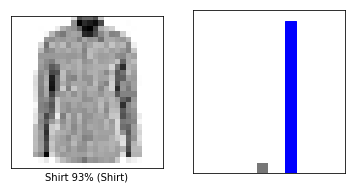

In [36]:
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

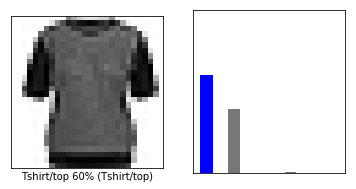

In [37]:
i = 12
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

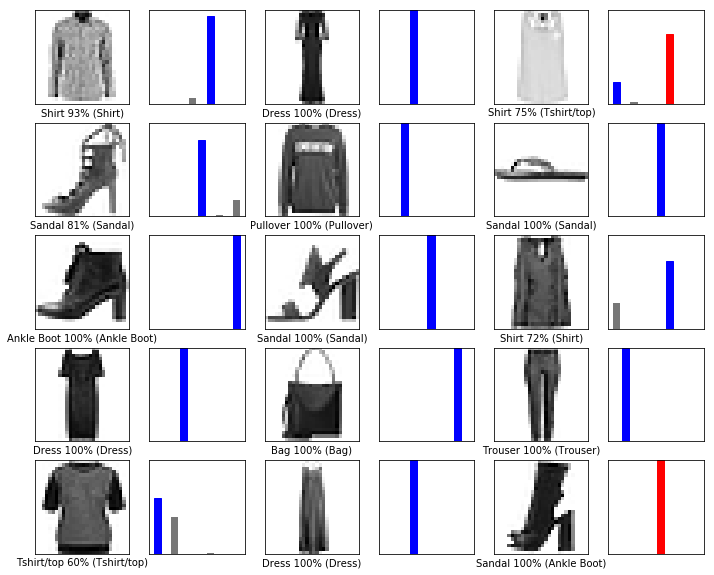

In [38]:
num_rows = 5
num_cols = 3
num_images = num_cols * num_rows
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [39]:
img = test_images[0]
print(img.shape)

(28, 28, 1)


In [40]:
img = np.array([img])
print(img.shape)

(1, 28, 28, 1)


In [41]:
predictions_single =model.predict(img)
print(predictions_single)

[[2.5711523e-07 1.3878972e-08 8.7588538e-05 1.7150377e-04 6.5697111e-02
  7.0439082e-10 9.3404305e-01 1.3751101e-11 4.0176286e-07 4.8919108e-10]]


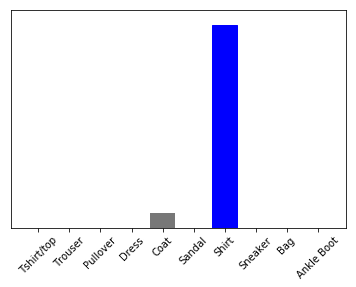

In [42]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)

In [43]:
np.argmax(predictions_single[0])

6